# Starter Guide of Philosophy From a Data Analysis Perspective
Philosophy is the study of fundamental questions about existence, knowledge, values, reason, mind, and language. Studying philosophy can help individuals develop critical thinking skills, clarify their beliefs and values, and engage in informed and reasoned discussions on complex issues. Philosophy also provides a historical perspective on the evolution of human thought and provides a foundation for understanding the development of scientific and political systems.Overall, studying philosophy can enhance one's ability to reason, make decisions, and lead a more reflective and meaningful life.

This data project attempts to produce a starter guide of philosophy reading for someone like me, who is a total outsider of this subject, from a data analysis perspective, based on the philosophy dataset available at https://www.kaggle.com/datasets/kouroshalizadeh/history-of-philosophy.

## Data Summary
The dataset contains over 300,000 sentences from over 50 texts spanning 10 major schools of philosophy. To summarize the schools and authors included, I count the number of their sentences, groupy by the titles of the texts.


In [10]:
#import library needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from nrclex import NRCLex
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chenyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#Read data
df=pd.read_csv('C:/Users/Chenyi/Desktop/DS/philosophy_data.csv')
#Summary of Schools and Authors
#Sentence count group by title level
summary=pd.DataFrame( df.groupby(by=['school','author','original_publication_date','title'])['title'].count())
summary.columns = ['sentence_count']
summary.to_csv("summary.csv")
summary

sentence_count
school          author          original_publication_date title                                                             
analytic        Kripke           1972                     Naming And Necessity                                          2681
                                 1975                     Philosophical Troubles                                        9798
                Lewis            1985                     Lewis - Papers                                               13120
                Moore            1910                     Philosophical Studies                                         3668
                Popper           1959                     The Logic Of Scientific Discovery                             4678
                Quine            1950                     Quintessence                                                  7373
                Russell          1912                     The Problems Of Philosophy                                    1560
                                 1921                     The Analysis Of Mind                                          3513
                Wittgenstein     1921                     Tractatus Logico-Philosophicus                                1212
                                 1950                     On Certainty                                                  1984
                                 1953                     Philosophical Investigations                                  5838
aristotle       Aristotle       -320                      Aristotle - Complete Works                                   48779
capitalism      Keynes           1936                     A General Theory Of Employment, Interest, And M...            3411
                Ricardo          1817                     On The Principles Of Political Economy And Taxa...            3090
                Smith            1776                     The Wealth Of Nations                                        11693
communism       Lenin            1862                     Essential Works Of Lenin                                      4469
                Marx             1848                     The Communist Manifesto                                        493
                                 1883                     Capital                                                      12996
continental     Deleuze          1968                     Difference And Repetition                                     5861
                                 1972                     Anti-Oedipus                                                  6679
                Derrida          1967                     Writing And Difference                                        5999
                Foucault         1961                     History Of Madness                                            8033
                                 1963                     The Birth Of The Clinic                                       2518
                                 1966                     The Order Of Things                                           4689
empiricism      Berkeley         1710                     A Treatise Concerning The Principles Of Human K...            1040
                                 1713                     Three Dialogues                                               1694
                Hume             1739                     A Treatise Of Human Nature                                    7047
                                 1779                     Dialogues Concerning Natural Religion                         1265
                Locke            1689                     Essay Concerning Human Understanding                          7742
                                                          Second Treatise On Government                                 1143
feminism        Beauvoir         1949                     The Second Sex                                      

## Section 1: Which Philosophers Are Easy to Understand? -- Uncommon Words Density Metric Visualization
Throughout the long history of world philosophy, there have been a great number of outstanding philosophers. To get started with this intricate literature, I would like to find those philosophers who are using easy laguages that are relatively easy to read and understand.

In this project, easy-reading philosophers are defined to be the ones use common and easy words. As a result, I define a metric of measuring the difficultness of reading as  

$$UncommonWordDensity =[\huge\frac{\sum\limits_{x=FirstIndex}^{LastIndex}  NumNotions}{\sum\limits_{x=FirstIndex}^{LastIndex} NumberOfWords}$$

The higher the metric is, the more difficult of a philosopher to read. I recognize this metric justifable because it would be challenging to predict what this sentence means provided there are too many unknown words in a sentence.

To calculate the metric for each philosopher, I add a list of CommonWords in the cell below. This list includes the most common words in English.

In [12]:
CommonWords="""#
$
%
-PRON-
&
(
)
*
+
, 
-
.
/
:
;
<
=
>
?
@
[
\
]
^
_
`
{
|
}
the
of
and
to
a
in
for
is
on
that
by
this
with
i
you
it
not
or
be
are
from
at
as
your
all
have
new
more
an
was
we
will
home
can
us
about
if
page
my
has
search
free
but
our
one
other
do
no
information
time
they
site
he
up
may
what
which
their
news
out
use
any
there
see
only
so
his
when
contact
here
business
who
web
also
now
help
get
pm
view
online
c
e
first
am
been
would
how
were
me
s
services
some
these
click
its
like
service
x
than
find
price
date
back
top
people
had
list
name
just
over
state
year
day
into
email
two
health
n
world
re
next
used
go
b
work
last
most
products
music
buy
data
make
them
should
product
system
post
her
city
t
add
policy
number
such
please
available
copyright
support
message
after
best
software
then
jan
good
video
well
d
where
info
rights
public
books
high
school
through
m
each
links
she
review
years
order
very
privacy
book
items
company
r
read
group
need
many
user
said
de
does
set
under
general
research
university
january
mail
full
map
reviews
program
life
know
games
way
days
management
p
part
could
great
united
hotel
real
f
item
international
center
ebay
must
store
travel
comments
made
development
report
off
member
details
line
terms
before
hotels
did
send
right
type
because
local
those
using
results
office
education
national
car
design
take
posted
internet
address
community
within
states
area
want
phone
dvd
shipping
reserved
subject
between
forum
family
l
long
based
w
code
show
o
even
black
check
special
prices
website
index
being
women
much
sign
file
link
open
today
technology
south
case
project
same
pages
uk
version
section
own
found
sports
house
related
security
both
g
county
american
photo
game
members
power
while
care
network
down
computer
systems
three
total
place
end
following
download
h
him
without
per
access
think
north
resources
current
posts
big
media
law
control
water
history
pictures
size
art
personal
since
including
guide
shop
directory
board
location
change
white
text
small
rating
rate
government
children
during
usa
return
students
v
shopping
account
times
sites
level
digital
profile
previous
form
events
love
old
john
main
call
hours
image
department
title
description
non
k
y
insurance
another
why
shall
property
class
cd
still
money
quality
every
listing
content
country
private
little
visit
save
tools
low
reply
customer
december
compare
movies
include
college
value
article
york
man
card
jobs
provide
j
food
source
author
different
press
u
learn
sale
around
print
course
job
canada
process
teen
room
stock
training
too
credit
point
join
science
men
categories
advanced
west
sales
look
english
left
team
estate
box
conditions
select
windows
photos
gay
thread
week
category
note
live
large
gallery
table
register
however
june
october
november
market
library
really
action
start
series
model
features
air
industry
plan
human
provided
tv
yes
required
second
hot
accessories
cost
movie
forums
march
la
september
better
say
questions
july
yahoo
going
medical
test
friend
come
dec
server
pc
study
application
cart
staff
articles
san
feedback
again
play
looking
issues
april
never
users
complete
street
topic
comment
financial
things
working
against
standard
tax
person
below
mobile
less
got
blog
party
payment
equipment
login
student
let
programs
offers
legal
above
recent
park
stores
side
act
problem
red
give
memory
performance
social
q
august
quote
language
story
sell
options
experience
rates
create
key
body
young
america
important
field
few
east
paper
single
ii
age
activities
club
example
girls
additional
password
z
latest
something
road
gift
question
changes
night
ca
hard
texas
oct
pay
four
poker
status
browse
issue
range
building
seller
court
february
always
result
audio
light
write
war
nov
offer
blue
groups
al
easy
given
files
event
release
analysis
request
fax
china
making
picture
needs
possible
might
professional
yet
month
major
star
areas
future
space
committee
hand
sun
cards
problems
london
washington
meeting
rss
become
interest
id
child
keep
enter
california
share
similar
garden
schools
million
added
reference
companies
listed
baby
learning
energy
run
delivery
net
popular
term
film
stories
put
computers
journal
reports
co
try
welcome
central
images
president
notice
original
head
radio
until
cell
color
self
council
away
includes
track
australia
discussion
archive
once
others
entertainment
agreement
format
least
society
months
log
safety
friends
sure
faq
trade
edition
cars
messages
marketing
tell
further
updated
association
able
having
provides
david
fun
already
green
studies
close
common
drive
specific
several
gold
feb
living
sep
collection
called
short
arts
lot
ask
display
limited
powered
solutions
means
director
daily
beach
past
natural
whether
due
et
electronics
five
upon
period
planning
database
says
official
weather
mar
land
average
done
technical
window
france
pro
region
island
record
direct
microsoft
conference
environment
records
st
district
calendar
costs
style
url
front
statement
update
parts
aug
ever
downloads
early
miles
sound
resource
present
applications
either
ago
document
word
works
material
bill
apr
written
talk
federal
hosting
rules
final
adult
tickets
thing
centre
requirements
via
cheap
kids
finance
true
minutes
else
mark
third
rock
gifts
europe
reading
topics
bad
individual
tips
plus
auto
cover
usually
edit
together
videos
percent
fast
function
fact
unit
getting
global
tech
meet
far
economic
en
player
projects
lyrics
often
subscribe
submit
germany
amount
watch
included
feel
though
bank
risk
thanks
everything
deals
various
words
linux
jul
production
commercial
james
weight
town
heart
advertising
received
choose
treatment
newsletter
archives
points
knowledge
magazine
error
camera
jun
girl
currently
construction
toys
registered
clear
golf
receive
domain
methods
chapter
makes
protection
policies
loan
wide
beauty
manager
india
position
taken
sort
listings
models
michael
known
half
cases
step
engineering
florida
simple
quick
none
wireless
license
paul
friday
lake
whole
annual
published
later
basic
sony
shows
corporate
google
church
method
purchase
customers
active
response
practice
hardware
figure
materials
fire
holiday
chat
enough
designed
along
among
death
writing
speed
html
countries
loss
face
brand
discount
higher
effects
created
remember
standards
oil
bit
yellow
political
increase
advertise
kingdom
base
near
environmental
thought
stuff
french
storage
oh
japan
doing
loans
shoes
entry
stay
nature
orders
availability
africa
summary
turn
mean
growth
notes
agency
king
monday
european
activity
copy
although
drug
pics
western
income
force
cash
employment
overall
bay
river
commission
ad
package
contents
seen
players
engine
port
album
regional
stop
supplies
started
administration
bar
institute
views
plans
double
dog
build
screen
exchange
types
soon
sponsored
lines
electronic
continue
across
benefits
needed
season
apply
someone
held
ny
anything
printer
condition
effective
believe
organization
effect
asked
eur
mind
sunday
selection
casino
pdf
lost
tour
menu
volume
cross
anyone
mortgage
hope
silver
corporation
wish
inside
solution
mature
role
rather
weeks
addition
came
supply
nothing
certain
usr
executive
running
lower
necessary
union
jewelry
according
dc
clothing
mon
com
particular
fine
names
robert
homepage
hour
gas
skills
six
bush
islands
advice
career
military
rental
decision
leave
british
teens
pre
huge
sat
woman
facilities
zip
bid
kind
sellers
middle
move
cable
opportunities
taking
values
division
coming
tuesday
object
lesbian
appropriate
machine
logo
length
actually
nice
score
statistics
client
ok
returns
capital
follow
sample
investment
sent
shown
saturday
christmas
england
culture
band
flash
ms
lead
george
choice
went
starting
registration
fri
thursday
courses
consumer
hi
airport
foreign
artist
outside
furniture
levels
channel
letter
mode
phones
ideas
wednesday
structure
fund
summer
allow
degree
contract
button
releases
wed
homes
super
male
matter
custom
virginia
almost
took
located
multiple
asian
distribution
editor
inn
industrial
cause
potential
song
cnet
ltd
los
hp
focus
late
fall
featured
idea
rooms
female
responsible
inc
communications
win
associated
thomas
primary
cancer
numbers
reason
tool
browser
spring
foundation
answer
voice
eg
friendly
schedule
documents
communication
purpose
feature
bed
comes
police
everyone
independent
ip
approach
cameras
brown
physical
operating
hill
maps
medicine
deal
hold
ratings
chicago
forms
glass
happy
tue
smith
wanted
developed
thank
safe
unique
survey
prior
telephone
sport
ready
feed
animal
sources
mexico
population
pa
regular
secure
navigation
operations
therefore
simply
evidence
station
christian
round
paypal
favorite
understand
option
master
valley
recently
probably
thu
rentals
sea
built
publications
blood
cut
worldwide
improve
connection
publisher
hall
larger
anti
networks
earth
parents
nokia
impact
transfer
introduction
kitchen
strong
tel
carolina
wedding
properties
hospital
ground
overview
ship
accommodation
owners
disease
tx
excellent
paid
italy
perfect
hair
opportunity
kit
classic
basis
command
cities
william
express
award
distance
tree
peter
assessment
ensure
thus
wall
ie
involved
el
extra
especially
interface
partners
budget
rated
guides
success
maximum
ma
operation
existing
quite
selected
boy
amazon
patients
restaurants
beautiful
warning
wine
locations
horse
vote
forward
flowers
stars
significant
lists
technologies
owner
retail
animals
useful
directly
manufacturer
ways
est
son
providing
rule
mac
housing
takes
iii
gmt
bring
catalog
searches
max
trying
mother
authority
considered
told
xml
traffic
programme
joined
input
strategy
feet
agent
valid
bin
modern
senior
ireland
teaching
door
grand
testing
trial
charge
units
instead
canadian
cool
normal
wrote
enterprise
ships
entire
educational
md
leading
metal
positive
fl
fitness
chinese
opinion
mb
asia
football
abstract
uses
output
funds
mr
greater
likely
develop
employees
artists
alternative
processing
responsibility
resolution
java
guest
seems
publication
pass
relations
trust
van
contains
session
multi
photography
republic
fees
components
vacation
century
academic
assistance
completed
skin
graphics
indian
prev
ads
mary
il
expected
ring
grade
dating
pacific
mountain
organizations
pop
filter
mailing
vehicle
longer
consider
int
northern
behind
panel
floor
german
buying
match
proposed
default
require
iraq
boys
outdoor
deep
morning
otherwise
allows
rest
protein
plant
reported
hit
transportation
mm
pool
mini
politics
partner
disclaimer
authors
boards
faculty
parties
fish
membership
mission
eye
string
sense
modified
pack
released
stage
internal
goods
recommended
born
unless
richard
detailed
japanese
race
approved
background
target
except
character
usb
maintenance
ability
maybe
functions
ed
moving
brands
places
php
pretty
trademarks
phentermine
spain
southern
yourself
etc
winter
battery
youth
pressure
submitted
boston
debt
keywords
medium
television
interested
core
break
purposes
throughout
sets
dance
wood
msn
itself
defined
papers
playing
awards
fee
studio
reader
virtual
device
established
answers
rent
las
remote
dark
programming
external
apple
le
regarding
instructions
min
offered
theory
enjoy
remove
aid
surface
minimum
visual
host
variety
teachers
isbn
martin
manual
block
subjects
agents
increased
repair
fair
civil
steel
understanding
songs
fixed
wrong
beginning
hands
associates
finally
az
updates
desktop
classes
paris
ohio
gets
sector
capacity
requires
jersey
un
fat
fully
father
electric
saw
instruments
quotes
officer
driver
businesses
dead
respect
unknown
specified
restaurant
mike
trip
pst
worth
mi
procedures
poor
teacher
eyes
relationship
workers
farm
georgia
peace
traditional
campus
tom
showing
creative
coast
benefit
progress
funding
devices
lord
grant
sub
agree
fiction
hear
sometimes
watches
careers
beyond
goes
families
led
museum
themselves
fan
transport
interesting
blogs
wife
evaluation
accepted
former
implementation
ten
hits
zone
complex
th
cat
galleries
references
die
presented
jack
flat
flow
agencies
literature
respective
parent
spanish
michigan
columbia
setting
dr
scale
stand
economy
highest
helpful
monthly
critical
frame
musical
definition
secretary
angeles
networking
path
australian
employee
chief
gives
kb
bottom
magazines
packages
detail
francisco
laws
changed
pet
heard
begin
individuals
colorado
royal
clean
switch
russian
largest
african
guy
titles
relevant
guidelines
justice
connect
bible
dev
cup
basket
applied
weekly
vol
installation
described
demand
pp
suite
vegas
na
square
chris
attention
advance
skip
diet
army
auction
gear
lee
os
difference
allowed
correct
charles
nation
selling
lots
piece
sheet
firm
seven
older
illinois
regulations
elements
species
jump
cells
module
resort
facility
random
pricing
dvds
certificate
minister
motion
looks
fashion
directions
visitors
documentation
monitor
trading
forest
calls
whose
coverage
couple
giving
chance
vision
ball
ending
clients
actions
listen
discuss
accept
automotive
naked
goal
successful
sold
wind
communities
clinical
situation
sciences
markets
lowest
highly
publishing
appear
emergency
developing
lives
currency
leather
determine
temperature
palm
announcements
patient
actual
historical
stone
bob
commerce
ringtones
perhaps
persons
difficult
scientific
satellite
fit
tests
village
accounts
amateur
ex
met
pain
xbox
particularly
factors
coffee
www
settings
buyer
cultural
steve
easily
oral
ford
poster
edge
functional
root
au
fi
closed
holidays
ice
pink
zealand
balance
monitoring
graduate
replies
shot
nc
architecture
initial
label
thinking
scott
llc
sec
recommend
canon
league
waste
minute
bus
provider
optional
dictionary
cold
accounting
manufacturing
sections
chair
fishing
effort
phase
fields
bag
fantasy
po
letters
motor
va
professor
context
install
shirt
apparel
generally
continued
foot
mass
crime
count
breast
techniques
ibm
rd
johnson
sc
quickly
dollars
websites
religion
claim
driving
permission
surgery
patch
heat
wild
measures
generation
kansas
miss
chemical
doctor
task
reduce
brought
himself
nor
component
enable
exercise
bug
santa
mid
guarantee
leader
diamond
israel
se
processes
soft
servers
alone
meetings
seconds
jones
arizona
keyword
interests
flight
congress
fuel
username
walk
produced
italian
paperback
classifieds
wait
supported
pocket
saint
rose
freedom
argument
competition
creating
jim
drugs
joint
premium
providers
fresh
characters
attorney
upgrade
di
factor
growing
thousands
km
stream
apartments
pick
hearing
eastern
auctions
therapy
entries
dates
generated
signed
upper
administrative
serious
prime
samsung
limit
began
louis
steps
errors
shops
del
efforts
informed
ga
ac
thoughts
creek
ft
worked
quantity
urban
practices
sorted
reporting
essential
myself
tours
platform
load
affiliate
labor
immediately
admin
nursing
defense
machines
designated
tags
heavy
covered
recovery
joe
guys
integrated
configuration
merchant
comprehensive
expert
universal
protect
drop
solid
cds
presentation
languages
became
orange
compliance
vehicles
prevent
theme
rich
im
campaign
marine
improvement
vs
guitar
finding
pennsylvania
examples
ipod
saying
spirit
ar
claims
challenge
motorola
acceptance
strategies
mo
seem
affairs
touch
intended
towards
sa
goals
hire
election
suggest
branch
charges
serve
affiliates
reasons
magic
mount
smart
talking
gave
ones
latin
multimedia
xp
avoid
certified
manage
corner
rank
computing
oregon
element
birth
virus
abuse
interactive
requests
separate
quarter
procedure
leadership
tables
define
racing
religious
facts
breakfast
kong
column
plants
faith
chain
developer
identify
avenue
missing
died
approximately
domestic
sitemap
recommendations
moved
houston
reach
comparison
mental
viewed
moment
extended
sequence
inch
attack
sorry
centers
opening
damage
lab
reserve
recipes
cvs
gamma
plastic
produce
snow
placed
truth
counter
failure
follows
eu
weekend
dollar
camp
ontario
automatically
des
minnesota
films
bridge
native
fill
williams
movement
printing
baseball
owned
approval
draft
chart
played
contacts
cc
jesus
readers
clubs
lcd
wa
jackson
equal
adventure
matching
offering
shirts
profit
leaders
posters
institutions
assistant
variable
ave
dj
advertisement
expect
parking
headlines
yesterday
compared
determined
wholesale
workshop
russia
gone
codes
kinds
extension
seattle
statements
golden
completely
teams
fort
cm
wi
lighting
senate
forces
funny
brother
gene
turned
portable
tried
electrical
applicable
disc
returned
pattern
ct
boat
named
theatre
laser
earlier
manufacturers
sponsor
classical
icon
warranty
dedicated
indiana
direction
harry
basketball
objects
ends
delete
evening
assembly
nuclear
taxes
mouse
signal
criminal
issued
brain
sexual
wisconsin
powerful
dream
obtained
false
da
cast
flower
felt
personnel
passed
supplied
identified
falls
pic
soul
aids
opinions
promote
stated
stats
hawaii
professionals
appears
carry
flag
decided
nj
covers
hr
em
advantage
hello
designs
maintain
tourism
priority
newsletters
adults
clips
savings
iv
graphic
atom
payments
rw
estimated
binding
brief
ended
winning
eight
anonymous
iron
straight
script
served
wants
miscellaneous
prepared
void
dining
alert
integration
atlanta
dakota
tag
interview
mix
framework
disk
installed
queen
vhs
credits
clearly
fix
handle
sweet
desk
criteria
pubmed
dave
massachusetts
diego
hong
vice
associate
ne
truck
behavior
enlarge
ray
frequently
revenue
measure
changing
votes
du
duty
looked
discussions
bear
gain
festival
laboratory
ocean
flights
experts
signs
lack
depth
iowa
whatever
logged
laptop
vintage
train
exactly
dry
explore
maryland
spa
concept
nearly
eligible
checkout
reality
forgot
handling
origin
knew
gaming
feeds
billion
destination
scotland
faster
intelligence
dallas
bought
con
ups
nations
route
followed
specifications
broken
tripadvisor
frank
alaska
zoom
blow
battle
residential
anime
speak
decisions
industries
protocol
query
clip
partnership
editorial
nt
expression
es
equity
provisions
speech
wire
principles
suggestions
rural
shared
sounds
replacement
tape
strategic
judge
spam
economics
acid
bytes
cent
forced
compatible
fight
apartment
height
null
zero
speaker
filed
gb
netherlands
obtain
bc
consulting
recreation
offices
designer
remain
managed
pr
failed
marriage
roll
korea
banks
fr
participants
secret
bath
aa
kelly
leads
negative
austin
favorites
toronto
theater
springs
missouri
andrew
var
perform
healthy
translation
estimates
font
assets
injury
mt
joseph
ministry
drivers
lawyer
figures
married
protected
proposal
sharing
philadelphia
portal
waiting
birthday
beta
fail
gratis
banking
officials
brian
toward
won
slightly
assist
conduct
contained
lingerie
legislation
calling
parameters
jazz
serving
bags
profiles
miami
comics
matters
houses
doc
postal
relationships
tennessee
wear
controls
breaking
combined
ultimate
wales
representative
frequency
introduced
minor
finish
departments
residents
noted
displayed
mom
reduced
physics
rare
spent
performed
extreme
samples
davis
daniel
bars
reviewed
row
oz
forecast
removed
helps
singles
administrator
cycle
amounts
contain
accuracy
dual
rise
usd
sleep
mg
bird
pharmacy
brazil
creation
static
scene
hunter
addresses
lady
crystal
famous
writer
chairman
violence
fans
oklahoma
speakers
drink
academy
dynamic
gender
eat
permanent
agriculture
dell
cleaning
constitutes
portfolio
practical
delivered
collectibles
infrastructure
exclusive
seat
concerns
colour
vendor
originally
intel
utilities
philosophy
regulation
officers
reduction
aim
bids
referred
supports
nutrition
recording
regions
junior
toll
les
cape
ann
rings
meaning
tip
secondary
wonderful
mine
ladies
henry
ticket
announced
guess
agreed
prevention
whom
ski
soccer
math
import
posting
presence
instant
mentioned
automatic
healthcare
viewing
maintained
ch
increasing
majority
connected
christ
dan
dogs
sd
directors
aspects
austria
ahead
moon
participation
scheme
utility
preview
fly
manner
matrix
containing
combination
devel
amendment
despite
strength
guaranteed
turkey
libraries
proper
distributed
degrees
singapore
enterprises
delta
fear
seeking
inches
phoenix
rs
convention
shares
principal
daughter
standing
comfort
colors
wars
cisco
ordering
kept
alpha
appeal
cruise
bonus
certification
previously
hey
bookmark
buildings
specials
beat
disney
household
batteries
adobe
smoking
bbc
becomes
drives
arms
alabama
tea
improved
trees
avg
achieve
positions
dress
subscription
dealer
contemporary
sky
utah
nearby
rom
carried
happen
exposure
panasonic
hide
permalink
signature
gambling
refer
miller
provision
outdoors
clothes
caused
luxury
babes
frames
certainly
indeed
newspaper
toy
circuit
layer
printed
slow
removal
easier
src
liability
trademark
hip
printers
faqs
nine
adding
kentucky
mostly
eric
spot
taylor
trackback
prints
spend
factory
interior
revised
grow
americans
optical
promotion
relative
amazing
clock
dot
hiv
identity
suites
conversion
feeling
hidden
reasonable
victoria
serial
relief
revision
broadband
influence
ratio
pda
importance
rain
onto
dsl
planet
webmaster
copies
recipe
zum
permit
seeing
proof
dna
diff
tennis
bass
prescription
bedroom
empty
instance
hole
pets
ride
licensed
orlando
specifically
tim
bureau
maine
sql
represent
conservation
pair
ideal
specs
recorded
don
pieces
finished
parks
dinner
lawyers
sydney
stress
cream
ss
runs
trends
yeah
discover
ap
patterns
boxes
louisiana
hills
javascript
fourth
nm
advisor
mn
marketplace
nd
evil
aware
wilson
shape
evolution
irish
certificates
objectives
stations
suggested
gps
op
remains
acc
greatest
firms
concerned
euro
operator
structures
generic
encyclopedia
usage
cap
ink
charts
continuing
mixed
census
interracial
peak
tn
competitive
exist
wheel
transit
suppliers
salt
compact
poetry
lights
tracking
angel
bell
keeping
preparation
attempt
receiving
matches
accordance
width
noise
engines
forget
array
discussed
accurate
stephen
elizabeth
climate
reservations
pin
playstation
alcohol
greek
instruction
managing
annotation
sister
raw
differences
walking
explain
smaller
newest
establish
gnu
happened
expressed
jeff
extent
sharp
lesbians
ben
lane
paragraph
kill
mathematics
aol
compensation
ce
export
managers
aircraft
modules
sweden
conflict
conducted
versions
employer
occur
percentage
knows
mississippi
describe
concern
backup
requested
citizens
connecticut
heritage
personals
immediate
holding
trouble
spread
coach
kevin
agricultural
expand
supporting
audience
assigned
jordan
collections
ages
participate
plug
specialist
cook
affect
virgin
experienced
investigation
raised
hat
institution
directed
dealers
searching
sporting
helping
perl
affected
lib
bike
totally
plate
expenses
indicate
blonde
ab
proceedings
favourite
transmission
anderson
utc
characteristics
der
lose
organic
seek
experiences
albums
cheats
extremely
verzeichnis
contracts
guests
hosted
diseases
concerning
developers
equivalent
chemistry
tony
neighborhood
nevada
kits
thailand
variables
agenda
anyway
continues
tracks
advisory
cam
curriculum
logic
template
prince
circle
soil
grants
anywhere
psychology
responses
atlantic
wet
circumstances
edward
investor
identification
ram
leaving
wildlife
appliances
matt
elementary
cooking
speaking
sponsors
fox
unlimited
respond
sizes
plain
exit
entered
iran
arm
keys
launch
wave
checking
costa
belgium
printable
holy
acts
guidance
mesh
trail
enforcement
symbol
crafts
highway
buddy
hardcover
observed
dean
setup
poll
booking
glossary
fiscal
celebrity
styles
denver
unix
filled
bond
channels
ericsson
appendix
notify
blues
chocolate
pub
portion
scope
hampshire
supplier
cables
cotton
bluetooth
controlled
requirement
authorities
biology
dental
killed
border
ancient
debate
representatives
starts
pregnancy
causes
arkansas
biography
leisure
attractions
learned
transactions
notebook
explorer
historic
attached
opened
tm
husband
disabled
authorized
crazy
upcoming
britain
concert
retirement
scores
financing
efficiency
sp
comedy
adopted
efficient
weblog
linear
commitment
specialty
bears
jean
hop
carrier
edited
constant
visa
mouth
jewish
meter
linked
portland
interviews
concepts
nh
gun
reflect
pure
deliver
wonder
lessons
fruit
begins
qualified
reform
lens
alerts
treated
discovery
draw
mysql
classified
relating
assume
confidence
alliance
fm
confirm
warm
neither
lewis
howard
offline
leaves
engineer
lifestyle
consistent
replace
clearance
connections
inventory
converter
organisation
babe
checks
reached
becoming
safari
objective
indicated
sugar
crew
legs
sam
stick
securities
allen
pdt
relation
enabled
genre
slide
montana
volunteer
tested
rear
democratic
enhance
switzerland
exact
bound
parameter
adapter
processor
node
formal
dimensions
contribute
lock
hockey
storm
micro
colleges
laptops
mile
showed
challenges
editors
mens
threads
bowl
supreme
brothers
recognition
presents
ref
tank
submission
dolls
estimate
encourage
navy
kid
regulatory
inspection
consumers
cancel
limits
territory
transaction
manchester
weapons
paint
delay
pilot
outlet
contributions
continuous
db
czech
resulting
cambridge
initiative
novel
pan
execution
disability
increases
ultra
winner
idaho
contractor
ph
episode
examination
potter
dish
plays
bulletin
ia
pt
indicates
modify
oxford
adam
truly
epinions
painting
committed
extensive
affordable
universe
candidate
databases
patent
slot
psp
outstanding
ha
eating
perspective
planned
watching
lodge
messenger
mirror
tournament
consideration
ds
discounts
sterling
sessions
kernel
stocks
buyers
journals
gray
catalogue
ea
jennifer
antonio
charged
broad
taiwan
und
chosen
demo
greece
lg
swiss
sarah
clark
labour
hate
terminal
publishers
nights
behalf
caribbean
liquid
rice
nebraska
loop
salary
reservation
foods
gourmet
guard
properly
orleans
saving
nfl
remaining
empire
resume
twenty
newly
raise
prepare
avatar
gary
depending
illegal
expansion
vary
hundreds
rome
arab
lincoln
helped
premier
tomorrow
purchased
milk
decide
consent
drama
visiting
performing
downtown
keyboard
contest
collected
nw
bands
boot
suitable
ff
absolutely
millions
lunch
audit
push
chamber
guinea
findings
muscle
featuring
iso
implement
clicking
scheduled
polls
typical
tower
yours
sum
misc
calculator
significantly
chicken
temporary
attend
shower
alan
sending
jason
tonight
dear
sufficient
holdem
shell
province
catholic
oak
vat
awareness
vancouver
governor
beer
seemed
contribution
measurement
swimming
spyware
formula
constitution
packaging
solar
jose
catch
jane
pakistan
ps
reliable
consultation
northwest
sir
doubt
earn
finder
unable
periods
classroom
tasks
democracy
attacks
kim
wallpaper
merchandise
const
resistance
doors
symptoms
resorts
biggest
memorial
visitor
twin
forth
insert
baltimore
gateway
ky
dont
alumni
drawing
candidates
charlotte
ordered
biological
fighting
transition
happens
preferences
spy
romance
instrument
bruce
split
themes
powers
heaven
br
bits
pregnant
twice
classification
focused
egypt
physician
hollywood
bargain
wikipedia
cellular
norway
vermont
asking
blocks
normally
lo
spiritual
hunting
diabetes
suit
ml
shift
chip
res
sit
bodies
photographs
cutting
wow
simon
writers
marks
flexible
loved
favourites
mapping
numerous
relatively
birds
satisfaction
represents
char
indexed
pittsburgh
superior
preferred
saved
paying
cartoon
shots
intellectual
moore
granted
choices
carbon
spending
comfortable
magnetic
interaction
listening
effectively
registry
crisis
outlook
massive
denmark
employed
bright
treat
header
cs
poverty
formed
piano
echo
que
grid
sheets
patrick
experimental
puerto
revolution
consolidation
displays
plasma
allowing
earnings
voip
mystery
landscape
dependent
mechanical
journey
delaware
bidding
consultants
risks
banner
applicant
charter
fig
barbara
cooperation
counties
acquisition
ports
implemented
sf
directories
recognized
dreams
blogger
notification
kg
licensing
stands
teach
occurred
textbooks
rapid
pull
hairy
diversity
cleveland
ut
reverse
deposit
seminar
investments
latina
nasa
wheels
specify
accessibility
dutch
sensitive
templates
formats
tab
depends
boots
holds
router
concrete
si
editing
poland
folder
womens
css
completion
upload
pulse
universities
technique
contractors
voting
courts
notices
subscriptions
calculate
mc
detroit
alexander
broadcast
converted
metro
toshiba
anniversary
improvements
strip
specification
pearl
accident
nick
accessible
accessory
resident
plot
qty
possibly
airline
typically
representation
regard
pump
exists
arrangements
smooth
conferences
uniprotkb
strike
consumption
birmingham
flashing
lp
narrow
afternoon
threat
surveys
sitting
putting
consultant
controller
ownership
committees
legislative
researchers
vietnam
trailer
anne
castle
gardens
missed
malaysia
unsubscribe
antique
labels
willing
bio
molecular
acting
heads
stored
exam
logos
residence
attorneys
antiques
density
hundred
ryan
operators
strange
sustainable
philippines
statistical
beds
mention
innovation
pcs
employers
grey
parallel
honda
amended
operate
bills
bold
bathroom
stable
opera
definitions
von
doctors
lesson
cinema
asset
ag
scan
elections
drinking
reaction
blank
enhanced
entitled
severe
generate
stainless
newspapers
hospitals
vi
deluxe
humor
aged
monitors
exception
lived
duration
bulk
successfully
indonesia
pursuant
sci
fabric
edt
visits
primarily
tight
domains
capabilities
pmid
contrast
recommendation
flying
recruitment
sin
berlin
cute
organized
ba
para
siemens
adoption
improving
cr
expensive
meant
capture
pounds
buffalo
organisations
plane
pg
explained
seed
programmes
desire
expertise
mechanism
camping
ee
jewellery
meets
welfare
peer
caught
eventually
marked
driven
measured
medline
bottle
agreements
considering
innovative
marshall
massage
rubber
conclusion
closing
tampa
thousand
meat
legend
grace
susan
ing
ks
adams
python
monster
alex
bang
villa
bone
columns
disorders
bugs
collaboration
hamilton
detection
ftp
cookies
inner
formation
tutorial
med
engineers
entity
cruises
gate
holder
proposals
moderator
sw
tutorials
settlement
portugal
lawrence
roman
duties
valuable
tone
collectables
ethics
forever
dragon
busy
captain
fantastic
imagine
brings
heating
leg
neck
hd
wing
governments
purchasing
scripts
abc
stereo
appointed
taste
dealing
commit
tiny
operational
rail
airlines
liberal
livecam
jay
trips
gap
sides
tube
turns
corresponding
descriptions
cache
belt
jacket
determination
animation
oracle
er
matthew
lease
productions
aviation
hobbies
proud
excess
disaster
console
commands
jr
telecommunications
instructor
giant
achieved
injuries
shipped
seats
approaches
biz
alarm
voltage
anthony
nintendo
usual
loading
stamps
appeared
franklin
angle
rob
vinyl
highlights
mining
designers
melbourne
ongoing
worst
imaging
betting
scientists
liberty
wyoming
blackjack
argentina
era
convert
possibility
analyst
commissioner
dangerous
garage
exciting
reliability
thongs
gcc
unfortunately
respectively
volunteers
attachment
ringtone
finland
morgan
derived
pleasure
honor
asp
oriented
eagle
desktops
pants
columbus
nurse
prayer
appointment
workshops
hurricane
quiet
luck
postage
producer
represented
mortgages
dial
responsibilities
cheese
comic
carefully
jet
productivity
investors
crown
par
underground
diagnosis
maker
crack
principle
picks
vacations
gang
semester
calculated
fetish
applies
casinos
appearance
smoke
apache
filters
incorporated
nv
craft
cake
notebooks
apart
fellow
blind
lounge
mad
algorithm
semi
coins
andy
gross
strongly
cafe
valentine
hilton
ken
proteins
horror
su
exp
familiar
capable
douglas
debian
till
involving
pen
investing
christopher
admission
epson
shoe
elected
carrying
victory
sand
madison
terrorism
joy
editions
cpu
mainly
ethnic
ran
parliament
actor
finds
seal
situations
fifth
allocated
citizen
vertical
corrections
structural
municipal
describes
prize
sr
occurs
jon
absolute
disabilities
consists
anytime
substance
prohibited
addressed
lies
pipe
soldiers
nr
guardian
lecture
simulation
layout
initiatives
ill
concentration
classics
lbs
lay
interpretation
horses
lol
dirty
deck
wayne
donate
taught
bankruptcy
mp
worker
optimization
alive
temple
substances
prove
discovered
wings
breaks
genetic
restrictions
participating
waters
promise
thin
exhibition
prefer
ridge
cabinet
modem
harris
mph
bringing
sick
dose
evaluate
tiffany
tropical
collect
bet
composition
toyota
streets
nationwide
vector
definitely
shaved
turning
buffer
purple
existence
commentary
larry
limousines
developments
def
immigration
destinations
lets
mutual
pipeline
necessarily
syntax
li
attribute
prison
skill
chairs
nl
everyday
apparently
surrounding
mountains
moves
popularity
inquiry
ethernet
checked
exhibit
throw
trend
sierra
visible
cats
desert
postposted
ya
oldest
rhode
nba
coordinator
obviously
mercury
steven
handbook
greg
navigate
worse
summit
victims
epa
spaces
fundamental
burning
escape
coupons
somewhat
receiver
substantial
tr
progressive
cialis
bb
boats
glance
scottish
championship
arcade
richmond
sacramento
impossible
ron
russell
tells
obvious
fiber
depression
graph
covering
platinum
judgment
bedrooms
talks
filing
foster
modeling
passing
awarded
testimonials
trials
tissue
nz
memorabilia
clinton
masters
bonds
cartridge
alberta
explanation
folk
org
commons
cincinnati
subsection
fraud
electricity
permitted
spectrum
arrival
okay
pottery
emphasis
roger
aspect
workplace
awesome
mexican
confirmed
counts
priced
wallpapers
hist
crash
lift
desired
inter
closer
assumes
heights
shadow
riding
infection
firefox
lisa
expense
grove
eligibility
venture
clinic
korean
healing
princess
mall
entering
packet
spray
studios
involvement
dad
buttons
placement
observations
vbulletin
funded
thompson
winners
extend
roads
subsequent
pat
dublin
rolling
fell
motorcycle
yard
disclosure
establishment
memories
nelson
te
arrived
creates
faces
tourist
av
mayor
murder
sean
adequate
senator
yield
presentations
grades
cartoons
pour
digest
reg
lodging
tion
dust
hence
wiki
entirely
replaced
radar
rescue
undergraduate
losses
combat
reducing
stopped
occupation
lakes
donations
associations
citysearch
closely
radiation
diary
seriously
kings
shooting
kent
adds
nsw
ear
flags
pci
baker
launched
elsewhere
pollution
conservative
guestbook
shock
effectiveness
walls
abroad
ebony
tie
ward
drawn
arthur
ian
visited
roof
walker
demonstrate
atmosphere
suggests
kiss
beast
ra
operated
experiment
targets
overseas
purchases
dodge
counsel
federation
pizza
invited
yards
assignment
chemicals
gordon
mod
farmers
rc
queries
bmw
rush
ukraine
absence
nearest
cluster
vendors
mpeg
whereas
yoga
serves
woods
surprise
lamp
rico
partial
shoppers
phil
everybody
couples
nashville
ranking
jokes
cst
http
ceo
simpson
twiki
sublime
counseling
palace
acceptable
satisfied
glad
wins
measurements
verify
globe
trusted
copper
milwaukee
rack
medication
warehouse
shareware
ec
rep
dicke
kerry
receipt
supposed
ordinary
nobody
ghost
violation
configure
stability
mit
applying
southwest
boss
pride
institutional
expectations
independence
knowing
reporter
metabolism
keith
champion
cloudy
linda
ross
personally
chile
anna
plenty
solo
sentence
throat
ignore
maria
uniform
excellence
wealth
tall
rm
somewhere
vacuum
dancing
attributes
recognize
brass
writes
plaza
pdas
outcomes
survival
quest
publish
sri
screening
toe
thumbnail
trans
jonathan
whenever
nova
lifetime
api
pioneer
booty
forgotten
acrobat
plates
acres
venue
athletic
thermal
essays
behaviour
vital
telling
fairly
coastal
config
cf
charity
intelligent
edinburgh
vt
excel
modes
obligation
campbell
wake
stupid
harbor
hungary
traveler
urw
segment
realize
regardless
lan
enemy
puzzle
rising
aluminum
wells
wishlist
opens
insight
sms
restricted
republican
secrets
lucky
latter
merchants
thick
trailers
repeat
syndrome
philips
attendance
penalty
drum
glasses
enables
nec
iraqi
builder
vista
jessica
chips
terry
flood
foto
ease
arguments
amsterdam
arena
adventures
pupils
stewart
announcement
tabs
outcome
appreciate
expanded
casual
grown
polish
lovely
extras
gm
centres
jerry
clause
smile
lands
ri
troops
indoor
bulgaria
armed
broker
charger
regularly
believed
pine
cooling
tend
gulf
rt
rick
trucks
cp
mechanisms
divorce
laura
shopper
tokyo
partly
nikon
customize
tradition
candy
pills
tiger
donald
folks
sensor
exposed
telecom
hunt
angels
deputy
indicators
sealed
thai
emissions
physicians
loaded
fred
complaint
scenes
experiments
afghanistan
dd
boost
spanking
scholarship
governance
mill
founded
supplements
chronic
icons
moral
den
catering
aud
finger
keeps
pound
locate
camcorder
pl
trained
burn
implementing
roses
labs
ourselves
bread
tobacco
wooden
motors
tough
roberts
incident
gonna
dynamics
lie
crm
rf
conversation
decrease
chest
pension
billy
revenues
emerging
worship
capability
ak
fe
craig
herself
producing
churches
precision
damages
reserves
contributed
solve
shorts
reproduction
minority
td
diverse
amp
ingredients
sb
ah
johnny
sole
franchise
recorder
complaints
facing
sm
nancy
promotions
tones
passion
rehabilitation
maintaining
sight
laid
clay
defence
patches
weak
refund
usc
towns
environments
trembl
divided
blvd
reception
amd
wise
emails
cyprus
wv
odds
correctly
insider
seminars
consequences
makers
hearts
geography
appearing
integrity
worry
ns
discrimination
eve
carter
legacy
marc
pleased
danger
vitamin
widely
processed
phrase
genuine
raising
implications
functionality
paradise
hybrid
reads
roles
intermediate
emotional
sons
leaf
pad
glory
platforms
ja
bigger
billing
diesel
versus
combine
overnight
geographic
exceed
bs
rod
saudi
fault
cuba
hrs
preliminary
districts
introduce
silk
promotional
kate
chevrolet
babies
bi
karen
compiled
romantic
revealed
specialists
generator
albert
examine
jimmy
graham
suspension
bristol
margaret
compaq
sad
correction
wolf
slowly
authentication
communicate
rugby
supplement
showtimes
cal
portions
infant
promoting
sectors
samuel
fluid
grounds
fits
kick
regards
meal
ta
hurt
machinery
bandwidth
unlike
equation
baskets
probability
pot
dimension
wright
img
barry
proven
schedules
admissions
cached
warren
slip
studied
reviewer
involves
quarterly
rpm
profits
devil
grass
comply
marie
florist
illustrated
cherry
continental
alternate
deutsch
achievement
limitations
kenya
webcam
cuts
funeral
nutten
earrings
enjoyed
automated
chapters
pee
charlie
quebec
passenger
convenient
dennis
mars
francis
tvs
sized
manga
noticed
socket
silent
literary
egg
mhz
signals
caps
orientation
pill
theft
childhood
swing
symbols
lat
meta
humans
analog
facial
choosing
talent
dated
flexibility
seeker
wisdom
shoot
boundary
mint
packard
offset
payday
philip
elite
gi
spin
holders
believes
swedish
poems
deadline
jurisdiction
robot
displaying
witness
collins
equipped
stages
encouraged
sur
winds
powder
broadway
acquired
assess
wash
cartridges
stones
entrance
gnome
roots
declaration
losing
attempts
gadgets
noble
glasgow
automation
impacts
rev
gospel
advantages
shore
loves
induced
ll
knight
preparing
loose
aims
recipient
linking
extensions
appeals
cl
earned
illness
islamic
athletics
southeast
ieee
ho
alternatives
pending
parker
determining
lebanon
corp
personalized
kennedy
gt
sh
conditioning
teenage
soap
ae
triple
cooper
nyc
vincent
jam
secured
unusual
answered
partnerships
destruction
slots
increasingly
migration
disorder
routine
toolbar
basically
rocks
conventional
titans
applicants
wearing
axis
sought
genes
mounted
habitat
firewall
median
guns
scanner
herein
occupational
animated
judicial
rio
hs
adjustment
hero
integer
treatments
bachelor
attitude
camcorders
engaged
falling
basics
montreal
carpet
rv
struct
lenses
binary
genetics
attended
difficulty
punk
collective
coalition
pi
dropped
enrollment
duke
walter
ai
pace
besides
wage
producers
ot
collector
arc
hosts
interfaces
advertisers
moments
atlas
strings
dawn
representing
observation
feels
torture
carl
deleted
coat
mitchell
mrs
rica
restoration
convenience
returning
ralph
opposition
container
yr
defendant
warner
confirmation
app
embedded
inkjet
supervisor
wizard
corps
actors
liver
peripherals
liable
brochure
morris
bestsellers
petition
eminem
recall
antenna
picked
assumed
departure
minneapolis
belief
killing
bikini
memphis
shoulder
decor
lookup
texts
harvard
brokers
roy
ion
diameter
ottawa
doll
ic
podcast
seasons
peru
interactions
refine
bidder
singer
evans
herald
literacy
fails
aging
nike
intervention
fed
plugin
attraction
diving
invite
modification
alice
latinas
suppose
customized
reed
involve
moderate
terror
younger
thirty
mice
opposite
understood
rapidly
dealtime
ban
temp
intro
mercedes
zus
assurance
clerk
happening
vast
mills
outline
amendments
tramadol
holland
receives
jeans
metropolitan
compilation
verification
fonts
ent
odd
wrap
refers
mood
favor
veterans
quiz
mx
sigma
gr
attractive
xhtml
occasion
recordings
jefferson
victim
demands
sleeping
careful
ext
beam
gardening
obligations
arrive
orchestra
sunset
tracked
moreover
minimal
polyphonic
lottery
tops
framed
aside
outsourcing
licence
adjustable
allocation
michelle
essay
discipline
amy
ts
demonstrated
dialogue
identifying
alphabetical
camps
declared
dispatched
aaron
handheld
trace
disposal
shut
florists
packs
ge
installing
switches
romania
voluntary
ncaa
thou
consult
phd
greatly
blogging
mask
cycling
midnight
ng
commonly
pe
photographer
inform
turkish
coal
cry
messaging
pentium
quantum
murray
intent
tt
zoo
largely
pleasant
announce
constructed
additions
requiring
spoke
aka
arrow
engagement
sampling
rough
weird
tee
refinance
lion
inspired
holes
weddings
blade
suddenly
oxygen
cookie
meals
canyon
goto
meters
merely
calendars
arrangement
conclusions
passes
bibliography
pointer
compatibility
stretch
durham
furthermore
permits
cooperative
muslim
xl
neil
sleeve
netscape
cleaner
cricket
beef
feeding
stroke
township
rankings
measuring
cad
hats
robin
robinson
jacksonville
strap
headquarters
sharon
crowd
tcp
transfers
surf
olympic
transformation
remained
attachments
dv
dir
entities
customs
administrators
personality
rainbow
hook
roulette
decline
gloves
israeli
medicare
cord
skiing
cloud
facilitate
subscriber
valve
val
hewlett
explains
proceed
flickr
feelings
knife
jamaica
priorities
shelf
bookstore
timing
liked
parenting
adopt
denied
fotos
incredible
britney
freeware
donation
outer
crop
deaths
rivers
commonwealth
pharmaceutical
manhattan
tales
katrina
workforce
islam
nodes
tu
fy
thumbs
seeds
cited
lite
ghz
hub
targeted
organizational
skype
realized
twelve
founder
decade
gamecube
rr
dispute
portuguese
tired
titten
adverse
everywhere
excerpt
eng
steam
discharge
ef
drinks
ace
voices
acute
halloween
climbing
stood
sing
tons
perfume
carol
honest
albany
hazardous
restore
stack
methodology
somebody
sue
ep
housewares
reputation
resistant
democrats
recycling
hang
gbp
curve
creator
amber
qualifications
museums
coding
slideshow
tracker
variation
passage
transferred
trunk
hiking
lb
pierre
jelsoft
headset
photograph
oakland
colombia
waves
camel
distributor
lamps
underlying
hood
wrestling
suicide
archived
photoshop
jp
chi
bt
arabia
gathering
projection
juice
chase
mathematical
logical
sauce
fame
extract
specialized
diagnostic
panama
indianapolis
af
payable
corporations
courtesy
criticism
automobile
confidential
rfc
statutory
accommodations
athens
northeast
downloaded
judges
sl
seo
retired
isp
remarks
detected
decades
paintings
walked
arising
nissan
bracelet
ins
eggs
juvenile
injection
yorkshire
populations
protective
afraid
acoustic
railway
cassette
initially
indicator
pointed
hb
jpg
causing
mistake
norton
locked
eliminate
tc
fusion
mineral
sunglasses
ruby
steering
beads
fortune
preference
canvas
threshold
parish
claimed
screens
cemetery
planner
croatia
flows
stadium
venezuela
exploration
mins
fewer
sequences
coupon
nurses
ssl
stem
proxy
astronomy
lanka
opt
edwards
drew
contests
flu
translate
announces
mlb
costume
tagged
berkeley
voted
killer
bikes
gates
adjusted
rap
tune
bishop
pulled
corn
gp
shaped
compression
seasonal
establishing
farmer
counters
puts
constitutional
grew
perfectly
tin
slave
instantly
cultures
norfolk
coaching
examined
trek
encoding
litigation
submissions
oem
heroes
painted
lycos
ir
zdnet
broadcasting
horizontal
artwork
cosmetic
resulted
portrait
terrorist
informational
ethical
carriers
ecommerce
mobility
floral
builders
ties
struggle
schemes
suffering
neutral
fisher
rat
spears
prospective
bedding
ultimately
joining
heading
equally
artificial
bearing
spectacular
coordination
connector
brad
combo
seniors
worlds
guilty
affiliated
activation
naturally
haven
tablet
jury
dos
tail
subscribers
charm
lawn
violent
mitsubishi
underwear
basin
soup
potentially
ranch
constraints
crossing
inclusive
dimensional
cottage
drunk
considerable
crimes
resolved
mozilla
byte
toner
nose
latex
branches
anymore
oclc
delhi
holdings
alien
locator
selecting
processors
pantyhose
plc
broke
nepal
zimbabwe
difficulties
juan
complexity
msg
constantly
browsing
resolve
barcelona
presidential
documentary
cod
territories
melissa
moscow
thesis
thru
jews
nylon
palestinian
discs
rocky
bargains
frequent
trim
nigeria
ceiling
pixels
ensuring
hispanic
cv
cb
legislature
hospitality
gen
anybody
procurement
diamonds
espn
fleet
untitled
bunch
totals
marriott
singing
theoretical
afford
exercises
starring
referral
nhl
surveillance
optimal
quit
distinct
protocols
lung
highlight
substitute
inclusion
hopefully
brilliant
turner
sucking
cents
reuters
ti
fc
gel
todd
spoken
omega
evaluated
stayed
civic
assignments
fw
manuals
doug
sees
termination
watched
saver
thereof
grill
households
gs
redeem
rogers
grain
aaa
authentic
regime
wanna
wishes
bull
montgomery
architectural
louisville
depend
differ
macintosh
movements
ranging
monica
repairs
breath
amenities
virtually
cole
mart
candle
hanging
colored
authorization
tale
verified
lynn
formerly
projector
bp
situated
comparative
std
seeks
herbal
loving
strictly
routing
docs
stanley
psychological
surprised
retailer
vitamins
elegant
gains
renewal
vid
genealogy
opposed
deemed
scoring
expenditure
brooklyn
liverpool
sisters
critics
connectivity
spots
oo
algorithms
hacker
madrid
similarly
margin
coin
solely
fake
salon
collaborative
norman
fda
excluding
turbo
headed
voters
cure
madonna
commander
arch
ni
murphy
thinks
thats
suggestion
hdtv
soldier
phillips
asin
aimed
justin
bomb
harm
interval
mirrors
spotlight
tricks
reset
brush
investigate
thy
expansys
panels
repeated
assault
connecting
spare
logistics
deer
kodak
tongue
bowling
tri
danish
pal
monkey
proportion
filename
skirt
florence
invest
honey
um
analyses
drawings
significance
scenario
ye
fs
lovers
atomic
approx
symposium
arabic
gauge
essentials
junction
protecting
nn
faced
mat
rachel
solving
transmitted
weekends
screenshots
produces
oven
ted
intensive
chains
kingston
sixth
engage
deviant
noon
switching
quoted
adapters
correspondence
farms
imports
supervision
cheat
bronze
expenditures
sandy
separation
testimony
suspect
celebrities
macro
sender
mandatory
boundaries
crucial
syndication
gym
celebration
kde
adjacent
filtering
tuition
spouse
exotic
viewer
signup
threats
luxembourg
puzzles
reaching
vb
damaged
cams
receptor
laugh
joel
surgical
destroy
citation
pitch
autos
yo
premises
perry
proved
offensive
imperial
dozen
benjamin
deployment
teeth
cloth
studying
colleagues
stamp
lotus
salmon
olympus
separated
proc
cargo
tan
directive
fx
salem
mate
dl
starter
upgrades
likes
butter
pepper
weapon
luggage
burden
chef
tapes
zones
races
isle
stylish
slim
maple
luke
grocery
offshore
governing
retailers
depot
kenneth
comp
alt
pie
blend
harrison
ls
julie
occasionally
cbs
attending
emission
pete
spec
finest
realty
janet
bow
penn
recruiting
apparent
instructional
phpbb
autumn
traveling
probe
midi
permissions
biotechnology
toilet
ranked
jackets
routes
packed
excited
outreach
helen
mounting
recover
tied
lopez
balanced
prescribed
catherine
timely
talked
debug
delayed
chuck
reproduced
hon
dale
explicit
calculation
villas
ebook
consolidated
exclude
peeing
occasions
brooks
equations
newton
oils
sept
exceptional
anxiety
bingo
whilst
spatial
respondents
unto
lt
ceramic
prompt
precious
minds
annually
considerations
scanners
atm
xanax
eq
pays
fingers
sunny
ebooks
delivers
je
queensland
necklace
musicians
leeds
composite
unavailable
cedar
arranged
lang
theaters
advocacy
raleigh
stud
fold
essentially
designing
threaded
uv
qualify
blair
hopes
assessments
cms
mason
diagram
burns
pumps
footwear
sg
vic
beijing
peoples
victor
mario
pos
attach
licenses
utils
removing
advised
brunswick
spider
phys
ranges
pairs
sensitivity
trails
preservation
hudson
isolated
calgary
interim
assisted
divine
streaming
approve
chose
compound
intensity
technological
syndicate
abortion
dialog
venues
blast
wellness
calcium
newport
antivirus
addressing
pole
discounted
indians
shield
harvest
membrane
prague
previews
bangladesh
constitute
locally
concluded
pickup
desperate
mothers
nascar
iceland
demonstration
governmental
manufactured
candles
graduation
mega
bend
sailing
variations
moms
sacred
addiction
morocco
chrome
tommy
springfield
refused
brake
exterior
greeting
ecology
oliver
congo
glen
botswana
nav
delays
synthesis
olive
undefined
unemployment
cyber
verizon
scored
enhancement
newcastle
clone
velocity
lambda
relay
composed
tears
performances
oasis
baseline
cab
angry
fa
societies
silicon
brazilian
identical
petroleum
compete
ist
norwegian
lover
belong
honolulu
beatles
lips
retention
exchanges
pond
rolls
thomson
barnes
soundtrack
wondering
malta
daddy
lc
ferry
rabbit
profession
seating
dam
cnn
separately
physiology
lil
collecting
das
exports
omaha
tire
participant
scholarships
recreational
dominican
chad
electron
loads
friendship
heather
passport
motel
unions
treasury
warrant
sys
solaris
frozen
occupied
josh
royalty
scales
rally
observer
sunshine
strain
drag
ceremony
somehow
arrested
expanding
provincial
investigations
icq
ripe
yamaha
rely
medications
hebrew
gained
rochester
dying
laundry
stuck
solomon
placing
stops
homework
adjust
assessed
advertiser
enabling
encryption
filling
downloadable
sophisticated
imposed
silence
scsi
focuses
soviet
possession
cu
laboratories
treaty
vocal
trainer
organ
stronger
volumes
advances
vegetables
lemon
toxic
dns
thumbnails
darkness
pty
ws
nuts
nail
bizrate
vienna
implied
span
stanford
sox
stockings
joke
respondent
packing
statute
rejected
satisfy
destroyed
shelter
chapel
gamespot
manufacture
layers
wordpress
guided
vulnerability
accountability
celebrate
accredited
appliance
compressed
bahamas
powell
mixture
bench
univ
tub
rider
scheduling
radius
perspectives
mortality
logging
hampton
christians
borders
therapeutic
pads
butts
inns
bobby
impressive
sheep
accordingly
architect
railroad
lectures
challenging
wines
nursery
harder
cups
ash
microwave
cheapest
accidents
travesti
relocation
stuart
contributors
salvador
ali
salad
np
monroe
tender
violations
foam
temperatures
paste
clouds
competitions
discretion
tft
tanzania
preserve
jvc
poem
unsigned
staying
cosmetics
easter
theories
repository
praise
jeremy
venice
concentrations
estonia
christianity
veteran
streams
landing
signing
executed
katie
negotiations
realistic
dt
cgi
showcase
integral
asks
relax
namibia
generating
christina
congressional
synopsis
hardly
prairie
reunion
composer
bean
sword
absent
photographic
sells
ecuador
hoping
accessed
spirits
modifications
coral
pixel
float
colin
bias
imported
paths
bubble
por
acquire
contrary
millennium
tribune
vessel
acids
focusing
viruses
cheaper
admitted
dairy
admit
mem
fancy
equality
samoa
gc
achieving
tap
stickers
fisheries
exceptions
reactions
leasing
lauren
beliefs
ci
macromedia
companion
squad
analyze
ashley
scroll
relate
divisions
swim
wages
additionally
suffer
forests
fellowship
nano
invalid
concerts
martial
males
victorian
retain
colours
execute
tunnel
genres
cambodia
patents
copyrights
yn
chaos
lithuania
mastercard
wheat
chronicles
obtaining
beaver
updating
distribute
readings
decorative
kijiji
confused
compiler
enlargement
eagles
bases
vii
accused
bee
campaigns
unity
loud
conjunction
bride
rats
defines
airports
instances
indigenous
begun
cfr
brunette
packets
anchor
socks
validation
parade
corruption
stat
trigger
incentives
cholesterol
gathered
essex
slovenia
notified
differential
beaches
folders
dramatic
surfaces
terrible
routers
cruz
pendant
dresses
baptist
scientist
starsmerchant
hiring
clocks
arthritis
bios
females
wallace
nevertheless
reflects
taxation
fever
pmc
cuisine
surely
practitioners
transcript
myspace
theorem
inflation
thee
nb
ruth
pray
stylus
compounds
pope
drums
contracting
arnold
structured
reasonably
jeep
chicks
bare
hung
cattle
mba
radical
graduates
rover
recommends
controlling
treasure
reload
distributors
flame
levitra
tanks
assuming
monetary
elderly
pit
arlington
mono
particles
floating
extraordinary
tile
indicating
bolivia
spell
hottest
stevens
coordinate
kuwait
exclusively
emily
alleged
limitation
widescreen
compile
webster
struck
rx
illustration
plymouth
warnings
construct
apps
inquiries
bridal
annex
mag
gsm
inspiration
tribal
curious
affecting
freight
rebate
meetup
eclipse
sudan
ddr
downloading
rec
shuttle
aggregate
stunning
cycles
affects
forecasts
detect
actively
ciao
ampland
knee
prep
pb
complicated
chem
fastest
butler
shopzilla
injured
decorating
payroll
cookbook
expressions
ton
courier
uploaded
shakespeare
hints
collapse
americas
connectors
unlikely
oe
gif
pros
conflicts
techno
beverage
tribute
wired
elvis
immune
latvia
travelers
forestry
barriers
cant
jd
rarely
gpl
infected
offerings
martha
genesis
barrier
argue
incorrect
trains
metals
bicycle
furnishings
letting
arise
guatemala
celtic
thereby
irc
jamie
particle
perception
minerals
advise
humidity
bottles
boxing
wy
dm
bangkok
renaissance
pathology
sara
bra
ordinance
hughes
photographers
infections
jeffrey
chess
operates
brisbane
configured
survive
oscar
festivals
menus
joan
possibilities
duck
reveal
canal
amino
phi
contributing
herbs
clinics
mls
cow
manitoba
analytical
missions
watson
lying
costumes
strict
dive
saddam
circulation
drill
offense
bryan
cet
protest
assumption
jerusalem
hobby
tries
transexuales
invention
nickname
fiji
technician
inline
executives
enquiries
washing
audi
staffing
cognitive
exploring
trick
enquiry
closure
raid
ppc
timber
volt
intense
div
playlist
registrar
showers
supporters
ruling
steady
dirt
statutes
withdrawal
myers
drops
predicted
wider
saskatchewan
jc
cancellation
plugins
enrolled
sensors
screw
ministers
publicly
hourly
blame
geneva
freebsd
veterinary
acer
prostores
reseller
dist
handed
suffered
intake
informal
relevance
incentive
butterfly
tucson
mechanics
heavily
swingers
fifty
headers
mistakes
numerical
ons
geek
uncle
defining
counting
reflection
sink
accompanied
assure
invitation
devoted
princeton
jacob
sodium
randy
spirituality
hormone
meanwhile
proprietary
timothy
childrens
brick
grip
naval
thumbzilla
medieval
porcelain
avi
bridges
pichunter
captured
watt
thehun
decent
casting
dayton
translated
shortly
cameron
columnists
pins
carlos
reno
donna
andreas
warrior
diploma
cabin
innocent
scanning
ide
consensus
polo
valium
copying
rpg
delivering
cordless
patricia
horn
eddie
uganda
fired
journalism
pd
prot
trivia
adidas
perth
frog
grammar
intention
syria
disagree
klein
harvey
tires
logs
undertaken
tgp
hazard
retro
leo
statewide
semiconductor
gregory
episodes
boolean
circular
anger
diy
mainland
illustrations
suits
chances
interact
snap
happiness
arg
substantially
bizarre
glenn
ur
auckland
olympics
fruits
identifier
geo
ribbon
calculations
doe
jpeg
conducting
startup
suzuki
trinidad
ati
kissing
wal
handy
swap
exempt
crops
reduces
accomplished
calculators
geometry
impression
abs
slovakia
flip
guild
correlation
gorgeous
capitol
sim
dishes
rna
barbados
chrysler
nervous
refuse
extends
fragrance
mcdonald
replica
plumbing
brussels
tribe
neighbors
trades
superb
buzz
transparent
nuke
rid
trinity
charleston
handled
legends
boom
calm
champions
floors
selections
projectors
inappropriate
exhaust
comparing
shanghai
speaks
burton
vocational
davidson
copied
scotia
farming
gibson
pharmacies
fork
troy
ln
roller
introducing
batch
organize
appreciated
alter
nicole
latino
ghana
edges
uc
mixing
handles
skilled
fitted
albuquerque
harmony
distinguished
asthma
projected
assumptions
shareholders
twins
developmental
rip
zope
regulated
triangle
amend
anticipated
oriental
reward
windsor
zambia
completing
gmbh
buf
ld
hydrogen
webshots
sprint
comparable
chick
advocate
sims
confusion
copyrighted
tray
inputs
warranties
genome
escorts
documented
thong
medal
paperbacks
coaches
vessels
harbour
walks
sol
keyboards
sage
knives
eco
vulnerable
arrange
artistic
bat
honors
booth
indie
reflected
unified
bones
breed
detector
ignored
polar
fallen
precise
sussex
respiratory
notifications
msgid
transexual
mainstream
invoice
evaluating
lip
subcommittee
sap
gather
suse
maternity
backed
alfred
colonial
mf
carey
motels
forming
embassy
cave
journalists
danny
rebecca
slight
proceeds
indirect
amongst
wool
foundations
msgstr
arrest
volleyball
mw
adipex
horizon
nu
deeply
toolbox
ict
marina
liabilities
prizes
bosnia
browsers
decreased
patio
dp
tolerance
surfing
creativity
lloyd
describing
optics
pursue
lightning
overcome
eyed
ou
quotations
grab
inspector
attract
brighton
beans
bookmarks
ellis
disable
snake
succeed
leonard
lending
oops
reminder
xi
searched
behavioral
riverside
bathrooms
plains
sku
ht
raymond
insights
abilities
initiated
sullivan
za
midwest
karaoke
trap
lonely
fool
ve
nonprofit
lancaster
suspended
hereby
observe
julia
containers
attitudes
karl
berry
collar
simultaneously
racial
integrate
bermuda
amanda
sociology
mobiles
screenshot
exhibitions
kelkoo
confident
retrieved
exhibits
officially
consortium
dies
terrace
bacteria
pts
replied
seafood
novels
rh
rrp
recipients
ought
delicious
traditions
fg
jail
safely
finite
kidney
periodically
fixes
sends
durable
mazda
allied
throws
moisture
hungarian
roster
referring
symantec
spencer
wichita
nasdaq
uruguay
ooo
hz
transform
timer
tablets
tuning
gotten
educators
tyler
futures
vegetable
verse
highs
humanities
independently
wanting
custody
scratch
launches
ipaq
alignment
henderson
bk
britannica
comm
ellen
competitors
nhs
rocket
aye
bullet
towers
racks
lace
nasty
visibility
latitude
consciousness
ste
tumor
ugly
deposits
beverly
mistress
encounter
trustees
watts
duncan
reprints
hart
bernard
resolutions
ment
accessing
forty
tubes
attempted
col
midlands
priest
floyd
ronald
analysts
queue
dx
sk
trance
locale
nicholas
biol
yu
bundle
hammer
invasion
witnesses
runner
rows
administered
notion
sq
skins
mailed
oc
fujitsu
spelling
arctic
exams
rewards
beneath
strengthen
defend
aj
frederick
medicaid
treo
infrared
seventh
gods
une
welsh
belly
aggressive
tex
advertisements
quarters
stolen
cia
soonest
haiti
disturbed
determines
sculpture
poly
ears
dod
wp
fist
naturals
neo
motivation
lenders
pharmacology
fitting
fixtures
bloggers
mere
agrees
passengers
quantities
petersburg
consistently
powerpoint
cons
surplus
elder
sonic
obituaries
cheers
dig
taxi
punishment
appreciation
subsequently
om
belarus
nat
zoning
gravity
providence
thumb
restriction
incorporate
backgrounds
treasurer
guitars
essence
flooring
lightweight
ethiopia
tp
mighty
athletes
humanity
transcription
jm
holmes
complications
scholars
dpi
scripting
gis
remembered
galaxy
chester
snapshot
caring
loc
worn
synthetic
shaw
vp
segments
testament
expo
dominant
twist
specifics
itunes
stomach
partially
buried
cn
newbie
minimize
darwin
ranks
wilderness
debut
generations
tournaments
bradley
deny
anatomy
bali
judy
sponsorship
headphones
fraction
trio
proceeding
cube
defects
volkswagen
uncertainty
breakdown
milton
marker
reconstruction
subsidiary
strengths
clarity
rugs
sandra
adelaide
encouraging
furnished
monaco
settled
folding
emirates
terrorists
airfare
comparisons
beneficial
distributions
vaccine
belize
fate
viewpicture
promised
volvo
penny
robust
bookings
threatened
minolta
republicans
discusses
gui
porter
gras
jungle
ver
rn
responded
rim
abstracts
zen
ivory
alpine
dis
prediction
pharmaceuticals
andale
fabulous
remix
alias
thesaurus
individually
battlefield
literally
newer
kay
ecological
spice
oval
implies
cg
soma
ser
cooler
appraisal
consisting
maritime
periodic
submitting
overhead
ascii
prospect
shipment
breeding
citations
geographical
donor
mozambique
tension
href
benz
trash
shapes
wifi
tier
fwd
earl
manor
envelope
diane
homeland
disclaimers
championships
excluded
andrea
breeds
rapids
disco
sheffield
bailey
aus
endif
finishing
emotions
wellington
incoming
prospects
lexmark
cleaners
bulgarian
hwy
eternal
cashiers
guam
cite
aboriginal
remarkable
rotation
nam
preventing
productive
boulevard
eugene
ix
gdp
pig
metric
compliant
minus
penalties
bennett
imagination
hotmail
refurbished
joshua
armenia
varied
grande
closest
activated
actress
mess
conferencing
assign
armstrong
politicians
trackbacks
lit
accommodate
tigers
aurora
una
slides
milan
premiere
lender
villages
shade
chorus
christine
rhythm
digit
argued
dietary
symphony
clarke
sudden
accepting
precipitation
marilyn
lions
findlaw
ada
pools
tb
lyric
claire
isolation
speeds
sustained
matched
approximate
rope
carroll
rational
programmer
fighters
chambers
dump
greetings
inherited
warming
incomplete
vocals
chronicle
fountain
chubby
grave
legitimate
biographies
burner
yrs
foo
investigator
gba
plaintiff
finnish
gentle
bm
prisoners
deeper
muslims
hose
mediterranean
nightlife
footage
howto
worthy
reveals
architects
saints
entrepreneur
carries
sig
freelance
duo
excessive
devon
screensaver
helena
saves
regarded
valuation
unexpected
cigarette
fog
characteristic
marion
lobby
egyptian
tunisia
metallica
outlined
consequently
headline
treating
punch
appointments
str
gotta
cowboy
narrative
bahrain
enormous
karma
consist
betty
queens
academics
pubs
quantitative
lucas
screensavers
subdivision
tribes
vip
defeat
clicks
distinction
honduras
naughty
hazards
insured
harper
livestock
mardi
exemption
tenant
sustainability
cabinets
tattoo
shake
algebra
shadows
holly
formatting
silly
nutritional
yea
mercy
hartford
freely
marcus
sunrise
wrapping
mild
fur
nicaragua
weblogs
timeline
tar
belongs
rj
readily
affiliation
soc
fence
nudist
infinite
diana
ensures
relatives
lindsay
clan
legally
shame
satisfactory
revolutionary
bracelets
sync
civilian
telephony
mesa
fatal
remedy
realtors
breathing
briefly
thickness
adjustments
graphical
genius
discussing
aerospace
fighter
meaningful
flesh
retreat
adapted
barely
wherever
estates
rug
democrat
borough
maintains
failing
shortcuts
ka
retained
voyeurweb
pamela
andrews
marble
extending
jesse
specifies
hull
logitech
surrey
briefing
belkin
dem
accreditation
wav
blackberry
highland
meditation
modular
microphone
macedonia
combining
brandon
instrumental
giants
organizing
shed
balloon
moderators
winston
memo
ham
solved
tide
kazakhstan
hawaiian
standings
partition
invisible
gratuit
consoles
funk
fbi
qatar
magnet
translations
porsche
cayman
jaguar
reel
sheer
commodity
posing
kilometers
rp
bind
thanksgiving
rand
hopkins
urgent
guarantees
infants
gothic
cylinder
witch
buck
indication
eh
congratulations
tba
cohen
sie
usgs
puppy
kathy
acre
graphs
surround
cigarettes
revenge
expires
enemies
lows
controllers
aqua
chen
emma
consultancy
finances
accepts
enjoying
conventions
eva
patrol
smell
pest
hc
italiano
coordinates
rca
fp
carnival
roughly
sticker
promises
responding
reef
physically
divide
stakeholders
hydrocodone
gst
consecutive
cornell
satin
bon
deserve
attempting
mailto
promo
jj
representations
chan
worried
tunes
garbage
competing
combines
mas
beth
bradford
len
phrases
kai
peninsula
chelsea
boring
reynolds
dom
jill
accurately
speeches
reaches
schema
considers
sofa
catalogs
ministries
vacancies
quizzes
parliamentary
obj
prefix
lucia
savannah
barrel
typing
nerve
dans
planets
deficit
boulder
pointing
renew
coupled
viii
myanmar
metadata
harold
circuits
floppy
texture
handbags
jar
ev
somerset
incurred
acknowledge
thoroughly
antigua
nottingham
thunder
tent
caution
identifies
questionnaire
qualification
locks
modelling
namely
miniature
dept
hack
dare
euros
interstate
pirates
aerial
hawk
consequence
rebel
systematic
perceived
origins
hired
makeup
textile
lamb
madagascar
nathan
tobago
presenting
cos
troubleshooting
uzbekistan
indexes
pac
rl
erp
centuries
gl
magnitude
ui
richardson
hindu
dh
fragrances
vocabulary
licking
earthquake
vpn
fundraising
fcc
markers
weights
albania
geological
assessing
lasting
wicked
eds
introduces
kills
roommate
webcams
pushed
webmasters
ro
df
computational
acdbentity
participated
junk
handhelds
wax
lucy
answering
hans
impressed
slope
reggae
failures
poet
conspiracy
surname
theology
nails
evident
whats
rides
rehab
epic
saturn
organizer
nut
allergy
sake
twisted
combinations
preceding
merit
enzyme
cumulative
zshops
planes
edmonton
tackle
disks
condo
pokemon
amplifier
ambien
arbitrary
prominent
retrieve
lexington
vernon
sans
worldcat
titanium
irs
fairy
builds
contacted
shaft
lean
bye
cdt
recorders
occasional
leslie
casio
deutsche
ana
postings
innovations
kitty
postcards
dude
drain
monte
fires
algeria
blessed
luis
reviewing
cardiff
cornwall
favors
potato
panic
explicitly
sticks
leone
transsexual
ez
citizenship
excuse
reforms
basement
onion
strand
pf
sandwich
uw
lawsuit
alto
informative
girlfriend
bloomberg
cheque
hierarchy
influenced
banners
reject
eau
abandoned
bd
circles
italic
beats
merry
mil
scuba
gore
complement
cult
dash
passive
mauritius
valued
cage
checklist
requesting
courage
verde
lauderdale
scenarios
gazette
hitachi
divx
extraction
batman
elevation
hearings
coleman
hugh
lap
utilization
beverages
calibration
jake
eval
efficiently
anaheim
ping
textbook
dried
entertaining
prerequisite
luther
frontier
settle
stopping
refugees
knights
hypothesis
palmer
medicines
flux
derby
sao
peaceful
altered
pontiac
regression
doctrine
scenic
trainers
muze
enhancements
renewable
intersection
passwords
sewing
consistency
collectors
conclude
recognised
munich
oman
celebs
gmc
propose
hh
azerbaijan
lighter
rage
adsl
uh
prix
astrology
advisors
pavilion
tactics
trusts
occurring
supplemental
travelling
talented
annie
pillow
induction
derek
precisely
shorter
harley
spreading
provinces
relying
finals
paraguay
steal
parcel
refined
fd
bo
fifteen
widespread
incidence
fears
predict
boutique
acrylic
rolled
tuner
avon
incidents
peterson
rays
asn
shannon
toddler
enhancing
flavor
alike
walt
homeless
horrible
hungry
metallic
acne
blocked
interference
warriors
palestine
listprice
libs
undo
cadillac
atmospheric
malawi
wm
pk
sagem
knowledgestorm
dana
halo
ppm
curtis
parental
referenced
strikes
lesser
publicity
marathon
ant
proposition
gays
pressing
gasoline
apt
dressed
scout
belfast
exec
dealt
niagara
inf
eos
warcraft
charms
catalyst
trader
bucks
allowance
vcr
denial
uri
designation
thrown
prepaid
raises
gem
duplicate
electro
criterion
badge
wrist
civilization
analyzed
vietnamese
heath
tremendous
ballot
lexus
varying
remedies
validity
trustee
maui
weighted
angola
performs
plastics
realm
corrected
jenny
helmet
salaries
postcard
elephant
yemen
encountered
tsunami
scholar
nickel
internationally
surrounded
psi
buses
expedia
geology
pct
wb
creatures
coating
commented
wallet
cleared
smilies
vids
accomplish
boating
drainage
shakira
corners
broader
vegetarian
rouge
yeast
yale
newfoundland
sn
qld
pas
clearing
investigated
dk
ambassador
coated
intend
stephanie
contacting
vegetation
doom
findarticles
louise
kenny
specially
owen
routines
hitting
yukon
beings
bite
issn
aquatic
reliance
habits
striking
myth
infectious
podcasts
singh
gig
gilbert
sas
ferrari
continuity
brook
fu
outputs
phenomenon
ensemble
insulin
assured
biblical
weed
conscious
accent
mysimon
eleven
wives
ambient
utilize
mileage
oecd
prostate
adaptor
auburn
unlock
hyundai
pledge
vampire
angela
relates
nitrogen
xerox
dice
merger
softball
referrals
quad
dock
differently
firewire
mods
nextel
framing
organised
musician
blocking
rwanda
sorts
integrating
vsnet
limiting
dispatch
revisions
papua
restored
hint
armor
riders
chargers
remark
dozens
varies
msie
reasoning
wn
liz
rendered
picking
charitable
guards
annotated
ccd
sv
convinced
openings
buys
burlington
replacing
researcher
watershed
councils
occupations
acknowledged
kruger
pockets
granny
pork
zu
equilibrium
viral
inquire
pipes
characterized
laden
aruba
cottages
realtor
merge
privilege
edgar
develops
qualifying
chassis
dubai
estimation
barn
pushing
llp
fleece
pediatric
boc
fare
dg
asus
pierce
allan
dressing
techrepublic
sperm
vg
bald
filme
craps
fuji
frost
leon
institutes
mold
dame
fo
sally
yacht
tracy
prefers
drilling
brochures
herb
tmp
alot
ate
breach
whale
traveller
appropriations
suspected
tomatoes
benchmark
beginners
instructors
highlighted
bedford
stationery
idle
mustang
unauthorized
clusters
antibody
competent
momentum
fin
wiring
io
pastor
mud
calvin
uni
shark
contributor
demonstrates
phases
grateful
emerald
gradually
laughing
grows
cliff
desirable
tract
ul
ballet
ol
journalist
abraham
js
bumper
afterwards
webpage
religions
garlic
hostels
shine
senegal
explosion
pn
banned
wendy
briefs
signatures
diffs
cove
mumbai
ozone
disciplines
casa
mu
daughters
conversations
radios
tariff
nvidia
opponent
pasta
simplified
muscles
serum
wrapped
swift
motherboard
runtime
inbox
focal
bibliographic
eden
distant
incl
champagne
ala
decimal
hq
deviation
superintendent
propecia
dip
nbc
samba
hostel
housewives
employ
mongolia
penguin
magical
influences
inspections
irrigation
miracle
manually
reprint
reid
wt
hydraulic
centered
robertson
flex
yearly
penetration
wound
belle
rosa
conviction
hash
omissions
writings
hamburg
lazy
mv
mpg
retrieval
qualities
cindy
fathers
carb
charging
cas
marvel
lined
cio
dow
prototype
importantly
rb
petite
apparatus
upc
terrain
dui
pens
explaining
yen
strips
gossip
rangers
nomination
empirical
mh
rotary
worm
dependence
discrete
beginner
boxed
lid
sexuality
polyester
cubic
deaf
commitments
suggesting
sapphire
kinase
skirts
mats
remainder
crawford
labeled
privileges
televisions
specializing
marking
commodities
pvc
serbia
sheriff
griffin
declined
guyana
spies
blah
mime
neighbor
motorcycles
elect
highways
thinkpad
concentrate
intimate
reproductive
preston
deadly
feof
bunny
chevy
molecules
rounds
longest
refrigerator
tions
intervals
sentences
dentists
usda
exclusion
workstation
holocaust
keen
flyer
peas
dosage
receivers
urls
customise
disposition
variance
navigator
investigators
cameroon
baking
marijuana
adaptive
computed
needle
baths
enb
gg
cathedral
brakes
og
nirvana
ko
fairfield
owns
til
invision
sticky
destiny
generous
madness
emacs
climb
blowing
fascinating
landscapes
heated
lafayette
jackie
wto
computation
hay
cardiovascular
ww
sparc
cardiac
salvation
dover
adrian
predictions
accompanying
vatican
brutal
learners
gd
selective
arbitration
configuring
token
editorials
zinc
sacrifice
seekers
guru
isa
removable
convergence
yields
gibraltar
levy
suited
numeric
anthropology
skating
kinda
aberdeen
emperor
grad
malpractice
dylan
bras
belts
blacks
educated
rebates
reporters
burke
proudly
pix
necessity
rendering
mic
inserted
pulling
basename
kyle
obesity
curves
suburban
touring
clara
vertex
bw
hepatitis
nationally
tomato
andorra
waterproof
expired
mj
travels
flush
waiver
pale
specialties
hayes
humanitarian
invitations
functioning
delight
survivor
garcia
cingular
economies
alexandria
bacterial
moses
counted
undertake
declare
continuously
johns
valves
gaps
impaired
achievements
donors
tear
jewel
teddy
lf
convertible
ata
teaches
ventures
nil
bufing
stranger
tragedy
julian
nest
pam
dryer
painful
velvet
tribunal
ruled
nato
pensions
prayers
funky
secretariat
nowhere
cop
paragraphs
gale
joins
adolescent
nominations
wesley
dim
lately
cancelled
scary
mattress
mpegs
brunei
likewise
banana
introductory
slovak
cakes
stan
reservoir
occurrence
idol
mixer
remind
wc
worcester
sbjct
demographic
charming
mai
tooth
disciplinary
annoying
respected
stays
disclose
affair
drove
washer
upset
restrict
springer
beside
mines
portraits
rebound
logan
mentor
interpreted
evaluations
fought
baghdad
elimination
metres
hypothetical
immigrants
complimentary
helicopter
pencil
freeze
hk
performer
abu
titled
commissions
sphere
powerseller
moss
ratios
concord
graduated
endorsed
ty
surprising
walnut
lance
ladder
italia
unnecessary
dramatically
liberia
sherman
cork
maximize
cj
hansen
senators
workout
mali
yugoslavia
bleeding
characterization
colon
likelihood
lanes
purse
fundamentals
contamination
mtv
endangered
compromise
optimize
stating
dome
caroline
leu
expiration
namespace
align
peripheral
bless
engaging
negotiation
crest
opponents
triumph
nominated
confidentiality
electoral
changelog
welding
deferred
alternatively
heel
alloy
condos
plots
polished
yang
gently
greensboro
tulsa
locking
casey
controversial
draws
fridge
blanket
bloom
qc
simpsons
lou
elliott
recovered
fraser
justify
upgrading
blades
pgp
loops
surge
frontpage
trauma
aw
tahoe
advert
possess
demanding
defensive
sip
flashers
subaru
forbidden
tf
vanilla
programmers
pj
monitored
installations
deutschland
picnic
souls
arrivals
spank
cw
practitioner
motivated
wr
dumb
smithsonian
hollow
vault
securely
examining
fioricet
groove
revelation
rg
pursuit
delegation
wires
bl
dictionaries
mails
backing
greenhouse
sleeps
vc
blake
transparency
dee
travis
wx
endless
figured
orbit
currencies
niger
bacon
survivors
positioning
heater
colony
cannon
circus
promoted
forbes
mae
moldova
mel
descending
paxil
spine
trout
enclosed
feat
temporarily
ntsc
cooked
thriller
transmit
apnic
fatty
gerald
pressed
frequencies
scanned
reflections
hunger
mariah
sic
municipality
usps
joyce
detective
surgeon
cement
experiencing
fireplace
endorsement
bg
planners
disputes
textiles
missile
intranet
closes
seq
psychiatry
persistent
deborah
conf
marco
assists
summaries
glow
gabriel
auditor
wma
aquarium
violin
prophet
cir
bracket
looksmart
isaac
oxide
oaks
magnificent
erik
colleague
naples
promptly
modems
adaptation
hu
harmful
paintball
prozac
sexually
enclosure
acm
dividend
newark
kw
paso
glucose
phantom
norm
playback
supervisors
westminster
turtle
ips
distances
absorption
treasures
dsc
warned
neural
ware
fossil
mia
hometown
badly
transcripts
apollo
wan
disappointed
persian
continually
communist
collectible
handmade
greene
entrepreneurs
robots
grenada
creations
jade
scoop
acquisitions
foul
keno
gtk
earning
mailman
sanyo
nested
biodiversity
excitement
somalia
movers
verbal
blink
presently
seas
carlo
workflow
mysterious
novelty
bryant
tiles
voyuer
librarian
subsidiaries
switched
stockholm
tamil
garmin
ru
pose
fuzzy
indonesian
grams
therapist
richards
mrna
budgets
toolkit
promising
relaxation
goat
render
carmen
ira
sen
thereafter
hardwood
erotica
temporal
sail
forge
commissioners
dense
dts
brave
forwarding
qt
awful
nightmare
airplane
reductions
southampton
istanbul
impose
organisms
sega
telescope
viewers
asbestos
portsmouth
cdna
meyer
enters
pod
savage
advancement
wu
harassment
willow
resumes
bolt
gage
throwing
existed
generators
lu
wagon
barbie
dat
favour
soa
knock
urge
smtp
generates
potatoes
thorough
replication
inexpensive
kurt
receptors
peers
roland
optimum
neon
interventions
quilt
huntington
creature
ours
mounts
syracuse
internship
lone
refresh
aluminium
snowboard
beastality
webcast
michel
evanescence
subtle
coordinated
notre
shipments
maldives
stripes
firmware
antarctica
cope
shepherd
lm
canberra
cradle
chancellor
mambo
lime
kirk
flour
controversy
legendary
bool
sympathy
choir
avoiding
beautifully
blond
expects
cho
jumping
fabrics
antibodies
polymer
hygiene
wit
poultry
virtue
burst
examinations
surgeons
bouquet
immunology
promotes
mandate
wiley
departmental
bbs
spas
ind
corpus
johnston
terminology
gentleman
fibre
reproduce
convicted
shades
jets
indices
roommates
adware
qui
intl
threatening
spokesman
zoloft
activists
frankfurt
prisoner
daisy
halifax
encourages
ultram
cursor
assembled
earliest
donated
stuffed
restructuring
insects
terminals
crude
morrison
maiden
simulations
cz
sufficiently
examines
viking
myrtle
bored
cleanup
yarn
knit
conditional
mug
crossword
bother
budapest
conceptual
knitting
attacked
hl
bhutan
liechtenstein
mating
compute
redhead
arrives
translator
automobiles
tractor
allah
continent
ob
unwrap
fares
longitude
resist
challenged
telecharger
hoped
pike
safer
insertion
instrumentation
ids
hugo
wagner
constraint
groundwater
touched
strengthening
cologne
gzip
wishing
ranger
smallest
insulation
newman
marsh
ricky
ctrl
scared
theta
infringement
bent
laos
subjective
monsters
asylum
lightbox
robbie
stake
cocktail
outlets
swaziland
varieties
arbor
mediawiki
configurations
poison
,
 ,"""

Now, through defining a function of extracting and counting the number of uncommon words in each sentence and applying it to the ogirinal dataframe, I can sort and visualize the difficultness of reading each philosopher. To be noticed, the function is applied to the lematized column, in which the words in every sentence are grouped together their inflected forms so they can be analysed as a single item.

In [ ]:
#Function of extracting and counting the uncommon words
def count_newnotion(Sentence):
    Dict=CommonWords.split("\n")
    b=0
    Notions=[]
    for a in Sentence.strip("[").strip("]").split(" "):
        a=a.lstrip(" ")
        a=a.strip("'")
        if a not in Dict:
            Dict.append(a)
            Notions.append(a)
            b+=1
    return (b,Notions)

#Main Function
df["Notions"]=df["lemmatized_str"].apply(count_newnotion)
df["NumOfNotions"]=df["Notions"].apply(lambda x: x[0])
df["Notions"]=df["Notions"].apply(lambda x: x[1])

#Save output dataframe
df.to_csv("philosophy_data_common_words_count.csv")

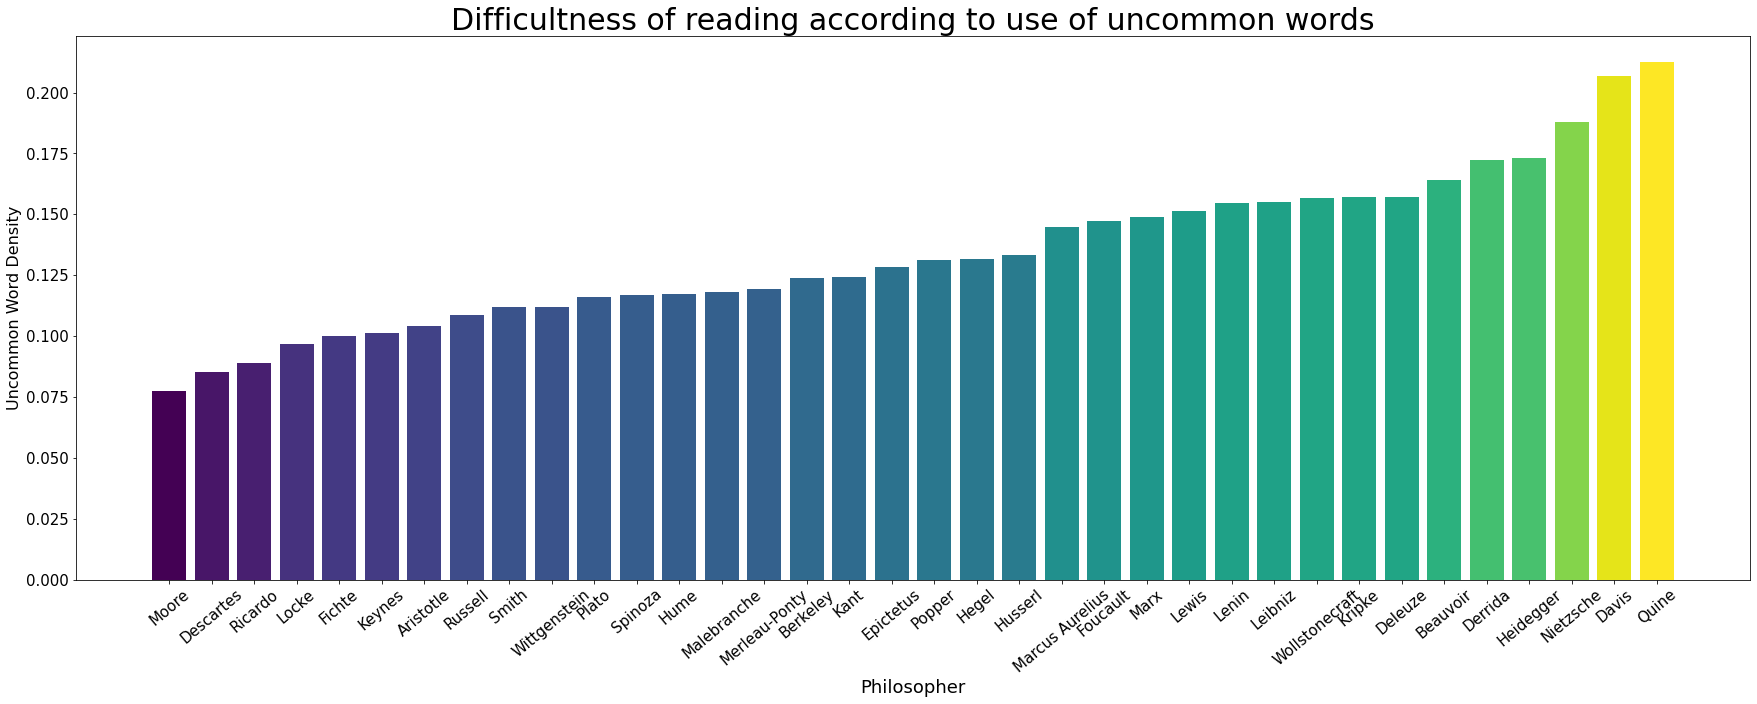

In [14]:
#Visualize the difficultness of reading each philosopher
DF=pd.read_csv('C:/Users/Chenyi/Desktop/DS/philosophy_data_common_words_count.csv')
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

DF["NumOfWords"]=DF["sentence_lowered"].apply(lambda x: len(x.split(" ")))
Uncommonness=(DF.groupby("author").sum()["NumOfNotions"]/DF.groupby("author").sum()["NumOfWords"]).sort_values()
fig,ax=plt.subplots(figsize=(30,10))
plt.bar(Uncommonness.index,Uncommonness.values,color=my_cmap(rescale(Uncommonness.values)))
ax.tick_params(labelsize=15)
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(40)
plt.xlabel('Philosopher', fontsize=18)
plt.ylabel('Uncommon Word Density', fontsize=16)
plt.title("Difficultness of reading according to use of uncommon words",fontsize=30)
plt.savefig("Difficultness of reading according to use of uncommon words.png",facecolor='white',transparent=False)

From the bar chart above, the difficultness of reading each philosopher according their use of uncommon words is now obvious. We can observe that the the philosopher on the left tend to use less uncommon words and the philosopher on the right tend to use more. The most reading-friendly philosopher is Moore, who uses around 75 uncommon words in every 1000 words. The philosopher using uncommon words most frequenlty is Quine, who uses over 200 of that in every 1000 words, which nearly triples that of Moore.

Next, I would like to choose one philosopher among those recognized as reading-friendly as a starting point to dive into the ocean of philosopy. Based on my previous skinny knowledge of philosophy, Smith, who is renowned as the father of modern economics with his book "The Wealth of Nations", is chosen. I will analyze Smith literature in the next section. 


## Section 2: What does Adam Smith Say? -- Word Cloud Based on TF-IDF
Before jumping into reading Smith, in order to quickly grasp the topics and themes he emphasizes on, a word cloud based on TF-IDF (term frequency-inverse document frequency) is generated to visualize the most important words in the corpus of his literature.

Word cloud is a visual presentation of highlighting the most significant words in a large body of text, with the most significant words appearing larger in the cloud. This allows for a quick and easy way to get a visual overview of present in the text data.

In this prohect, the significance of each word in this project is quantified by the TF-IDF. TF-IDF measures the importance of each word in a document by combining two factors: term frequency (TF) and inverse document frequency (IDF). TF counts the number of times a word appears in a document, while IDF penalizes commonly occurring words and emphasizes rare words that carry more meaning.

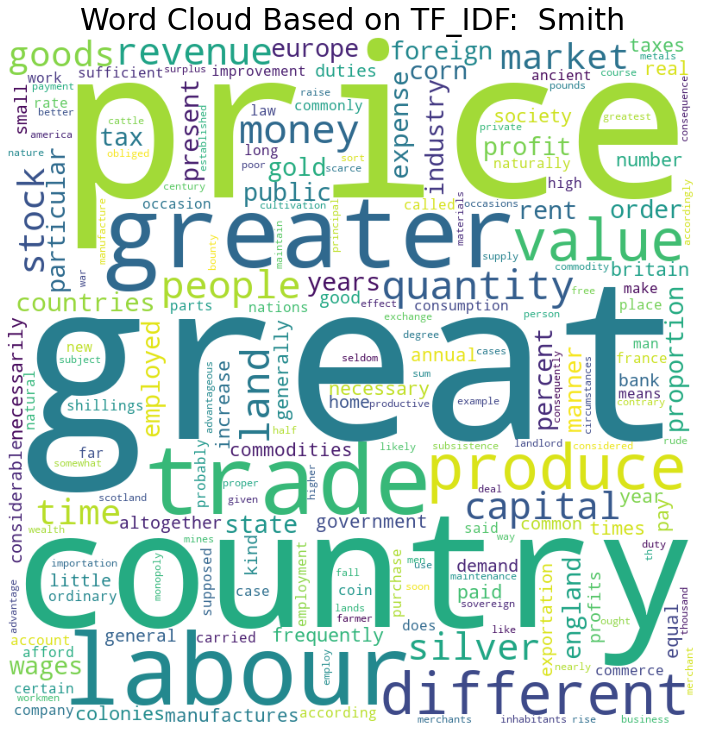

In [15]:
#a list of words with little meaning removed from the text data before analysis
stopwords = set(STOPWORDS)

def WordCloud_TF_IDF (author,df):
    
    #Calculate TF-IDF score
    df_author=df[df['author']==author]
    corpus=[]
    for word in df_author['sentence_str']:
        corpus+=([word])
    vectorizer = TfidfVectorizer(stop_words='english')
    vecs = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names()
    dense = vecs.todense()
    lst1 = dense.tolist()
    matrix = pd.DataFrame(lst1, columns=feature_names)
    
    #Draw WordCloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white',
                          stopwords = stopwords,  min_font_size = 10).generate_from_frequencies(matrix.T.sum(axis=1))
    
    plt.figure(figsize = (10, 10)) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud Based on TF_IDF:  ' + author)
    plt.tight_layout(pad = 0) 
    plt.savefig('Word Cloud Based on TF_IDF for '+author+'.png',facecolor='white',transparent=False)
    plt.show() 

#Main Function
WordCloud_TF_IDF('Smith',df)

Some keywords are now on the table for us to figure out the important issues of the western modern economics philosophy,namely capitalism, under Smith's writing. From keywords like "price", "quantity", "demand" and "market", it is suggested that Smith explains that prices are determined by supply and demand in a free market. From words such as "country", "commodities", "trade" and "foreign", it could be inferred that Smith talk about international free trade.

## Topic 3: Capitalism Prospered through Era -- Sentiment Analysis
After reading through Smith, I'm interested in learning more about the philosophical shcool he belongs to: capitalism.

In [16]:
#Data summary of Capitalism
summary.reset_index(inplace=True)
school=summary[summary['author']=='Smith']['school'].unique()[0]
summary_school=summary[summary['school']==school]
summary_school

,school,author,original_publication_date,title,sentence_count
12,capitalism,Keynes,1936,"A General Theory Of Employment, Interest, And ...",3411
13,capitalism,Ricardo,1817,On The Principles Of Political Economy And Tax...,3090
14,capitalism,Smith,1776,The Wealth Of Nations,11693


In the dataset, there are 3 books under the school category of capitalism, in year 1776, 1817 and 1936. Now my interest lies on the sentiment change of these capitalism philosophers throughout eras. I utilized NRC Word-Emotion Lexicon to recognize the sentiments for each book in 10 emotional category: positive,negative, anger, fear, anticipation, trust, surprise, sadness, joy, and disgust. 

Next, for each book, emotion scores for every emotional category can be calculated as the number of emotion word per word. In my study, only 5 major emotion features are selected for further visualization and analysis, including positive, trust, anticipation, negative and fear, as I ignore the intense emtionas such as disgust and joy because they are not significant in the rational and objective narration in Philosophy.

The following multiple bar chart demonstrates these emotion scores in different eras.

<ipython-input-17-a3d72e331cf6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k][i]= v


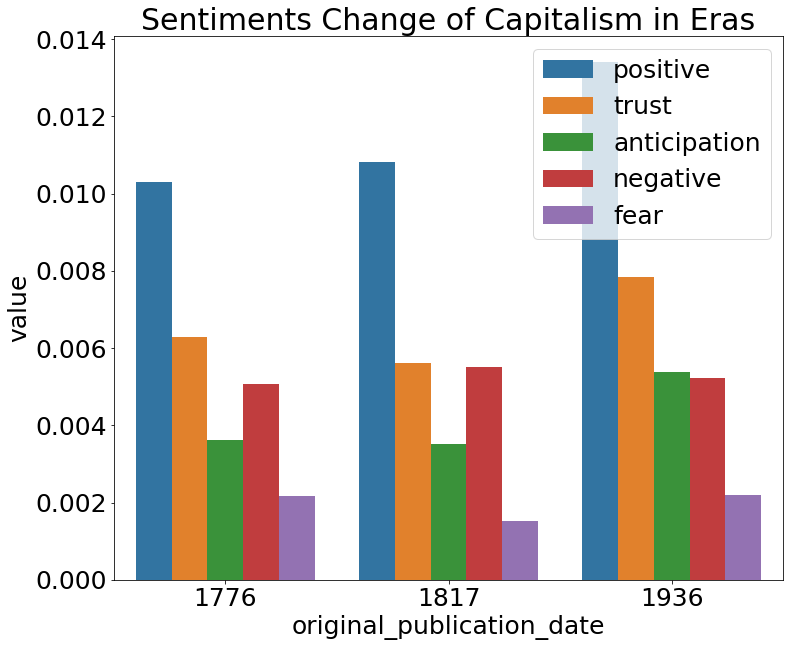

In [17]:
#select a subset of original dataset where school is capitalism.
df =df[df.school == "capitalism"].reset_index(drop=True)

#Function of getting a dataframe of the 10 sentiment classification of each sentences
def get_NRC_scores(df):
    n = len(df)
    emotions = ["fear", "anger", "anticipation", "trust", "surprise", "positive", "negative", "sadness", "disgust",
                "joy"]
    for emotion in emotions:
        df[emotion] = 0

    for i in range(n):
        nrc_obj = NRCLex(df.sentence_lowered[i])
        for k, v in nrc_obj.raw_emotion_scores.items():
            df[k][i]= v
    return df

# Main Function
df = get_NRC_scores(df)
df.to_csv("sentiment_socres_capitalism.csv")
#Obtain a dataframe for bar chart plotting
emotions = ["fear", "anger", "anticipation", "trust", "surprise", "positive", "negative", "sadness", "disgust","joy"]
dates = df.original_publication_date.unique()
df1 = df.groupby(["original_publication_date"]).sum().iloc[:,1:].reset_index(drop=False)
for emotion in emotions:
    df1[emotion] = df1.apply(lambda x:x[emotion] / x["sentence_length"],axis=1)
    
df1 = df1.melt(id_vars=["original_publication_date","sentence_length"],value_vars=["positive","trust","anticipation","negative","fear"],var_name="emotion",value_name = "value")

#Plot multi-bar chart through the history of Capitalism
plt.figure(figsize=(12,10))
sns.barplot(x="original_publication_date",y="value",hue = "emotion", data=df1)
plt.legend(loc=0) 
plt.title('Sentiments Change of Capitalism in Eras')
plt.savefig("era_bar.png",facecolor='white',transparent=False)
plt.show()

In the multiple bar chart above, a significant and steady increase of positive is the most observable from 1817 to 1936, while trust, anticipation, negative and fear score generally remain at same levels. This may indicate an upward optimistic view towards capitalisim throughout the era, which further implies a prosperity of capitalism during the time.

However, the limitation of using NRC Word-Emotion Lexicon should also be noticed. As it is a method based on each word independently and does not take into account the context in which a word is used, its emotional connotation may not be accurate enough.